In [31]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
from calendar import month_abbr
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from warnings import filterwarnings
filterwarnings('ignore')

### 1.0. Explore Datasets

#### 1.1. Aus Production Bricks

In [33]:
df_aus = pd.read_csv('../data/aus_production.csv', index_col=[0])

df_aus_brick = df_aus[['Quarter', 'Bricks']]

df_aus_brick['Quarter'] = df_aus_brick['Quarter'].apply(lambda x: x.replace(' ', '-'))
df_aus_brick['Quarter'] = pd.PeriodIndex(df_aus_brick['Quarter'], freq='Q')

In [34]:
df_aus_brick.isna().sum()

Quarter     0
Bricks     20
dtype: int64

In [35]:
df_aus_brick.dropna(inplace=True)

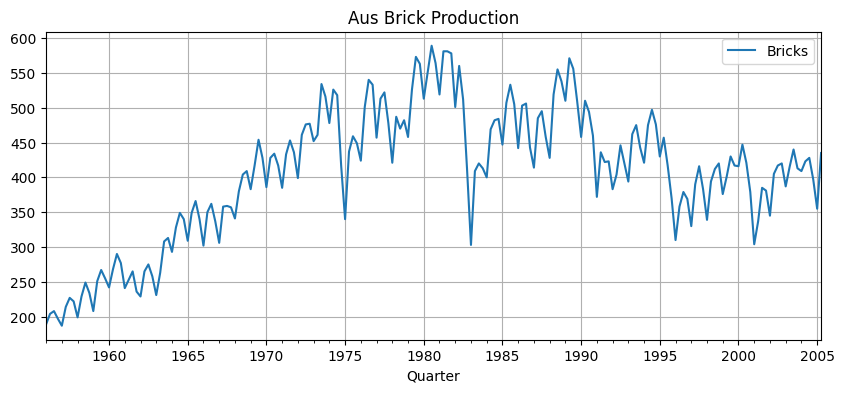

In [36]:
df_aus_brick.plot(
    x='Quarter', 
    y='Bricks',
    figsize=(10,4),
    grid=2,
    title='Aus Brick Production'
);

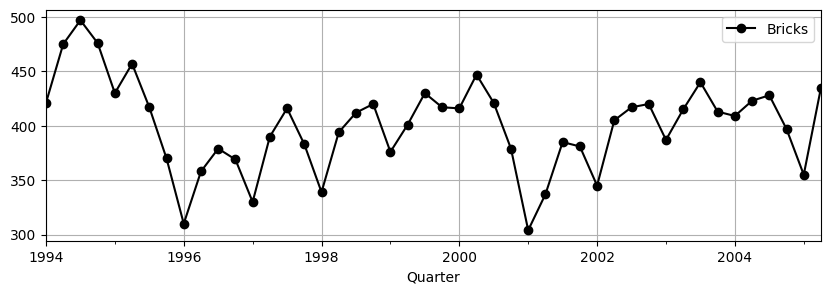

In [65]:
df_aus_brick[df_aus_brick["Quarter"] >= str(df_aus_brick.Quarter.max().qyear - 11)].plot(
    x="Quarter",
    y="Bricks",
    marker="o",
    color="k",
    grid=2,
    figsize=(10,3)
);

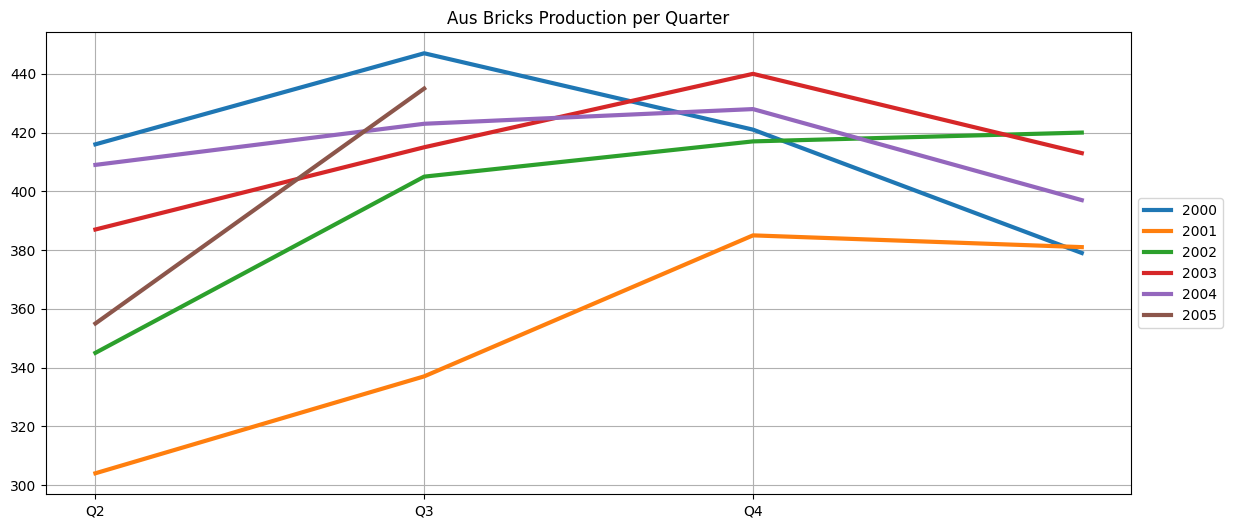

In [7]:
df_aus_brick['quarter_index'] = df_aus_brick.Quarter.dt.quarter
df_aus_brick['year'] = df_aus_brick.Quarter.dt.year

df_aus_brick = df_aus_brick.sort_values(by='year').reset_index(drop=True)

# filter last 5 years
df_aus_brick_plot = df_aus_brick.iloc[-(4 * 6) + 2:, :]

fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(
    range(0, df_aus_brick.quarter_index.nunique()),
    ['Q' + str(k) for k in df_aus_brick.quarter_index.unique()]
)

for year in df_aus_brick_plot.year.unique():
    aux = df_aus_brick_plot[df_aus_brick_plot['year'] == year]
    aux.sort_values(by='quarter_index', inplace=True)
    ax.plot(aux['quarter_index'], aux['Bricks'], label=year, lw=3)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Aus Bricks Production per Quarter')
ax.grid(2)

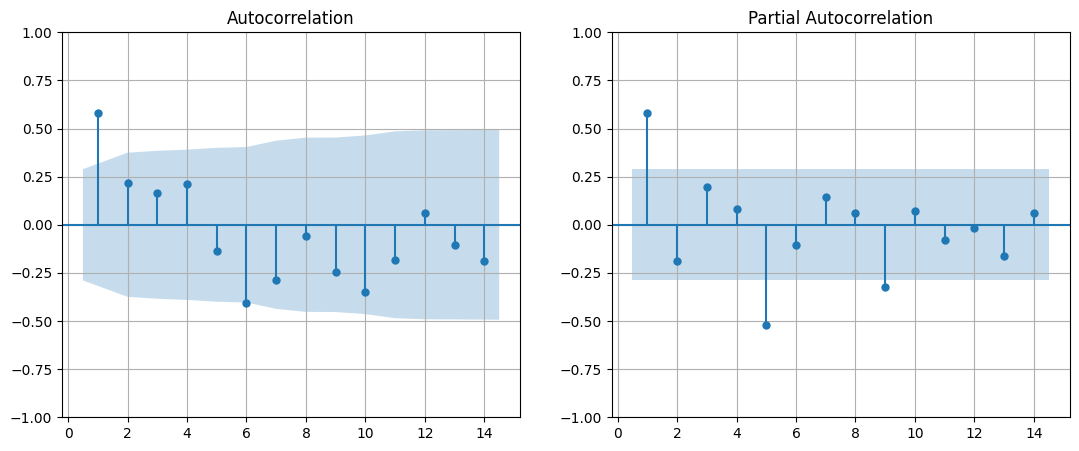

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax = ax.flatten()
dfp = df_aus_brick[df_aus_brick["Quarter"] >= str(df_aus_brick.Quarter.max().qyear - 11)]

plot_acf(dfp['Bricks'], ax=ax[0], lags=range(1,15));
plot_pacf(dfp['Bricks'], ax=ax[-1], lags=range(1,15));
for axi in ax: axi.grid(1)

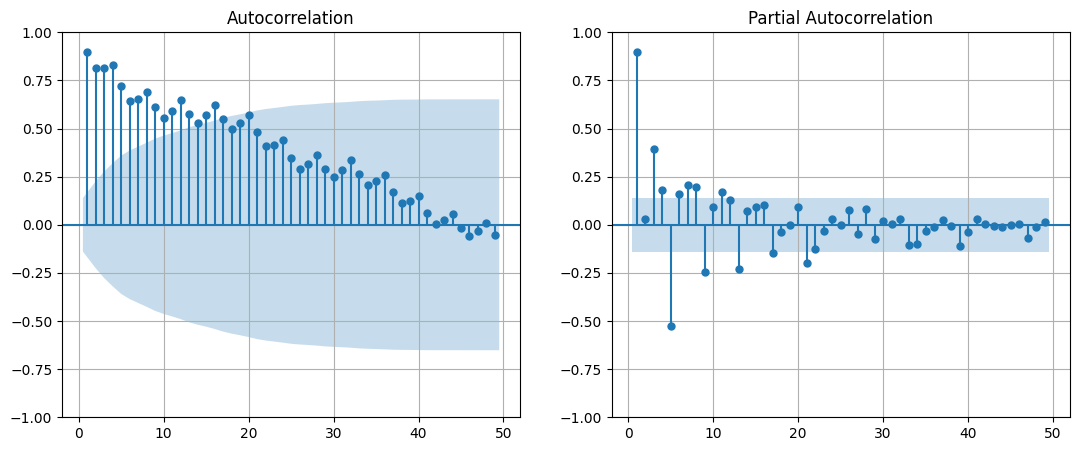

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax = ax.flatten()
plot_acf(df_aus_brick['Bricks'], ax=ax[0], lags=range(1,50));
plot_pacf(df_aus_brick['Bricks'], ax=ax[-1], lags=range(1,50));
for axi in ax: axi.grid(1)

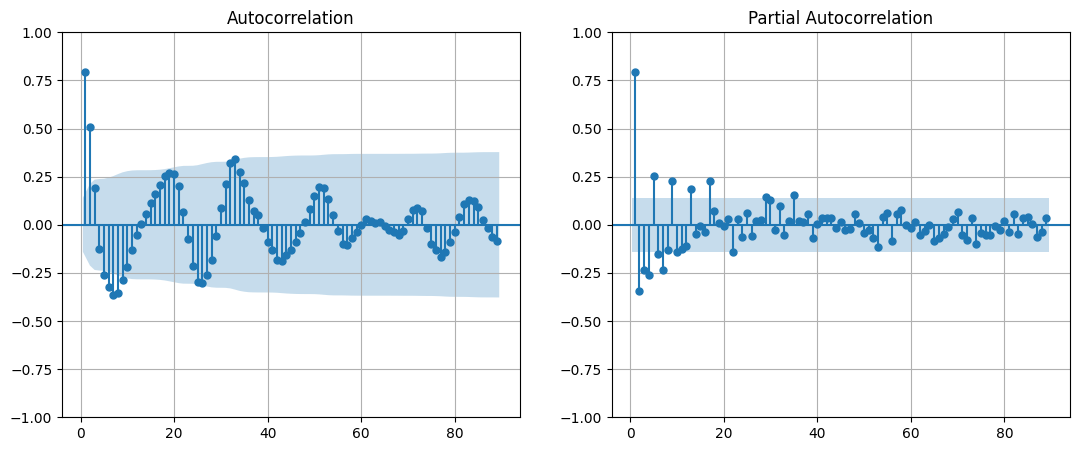

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax = ax.flatten()
plot_acf(df_aus_brick['Bricks'].diff(4).dropna(), ax=ax[0], lags=range(1,90));
plot_pacf(df_aus_brick['Bricks'].diff(4).dropna(), ax=ax[-1], lags=range(1,90));
for axi in ax: axi.grid(1)

In [14]:
df_aus_brick['Q'] = df_aus_brick['Quarter'].dt.quarter

# Create Lag Columns
for k in range(1, 7):
    df_aus_brick[f'lag_{k}'] = df_aus_brick['Bricks'].shift(k)

df_aus_brick.head(7)

Quarter  Bricks  quarter_index  year  Q  lag_1  lag_2  lag_3  lag_4  lag_5   
0  1956Q1   189.0              1  1956  1    NaN    NaN    NaN    NaN    NaN  \
1  1956Q2   204.0              2  1956  2  189.0    NaN    NaN    NaN    NaN   
2  1956Q3   208.0              3  1956  3  204.0  189.0    NaN    NaN    NaN   
3  1956Q4   197.0              4  1956  4  208.0  204.0  189.0    NaN    NaN   
4  1957Q1   187.0              1  1957  1  197.0  208.0  204.0  189.0    NaN   
5  1957Q2   214.0              2  1957  2  187.0  197.0  208.0  204.0  189.0   
6  1957Q3   227.0              3  1957  3  214.0  187.0  197.0  208.0  204.0   

   lag_6  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6  189.0

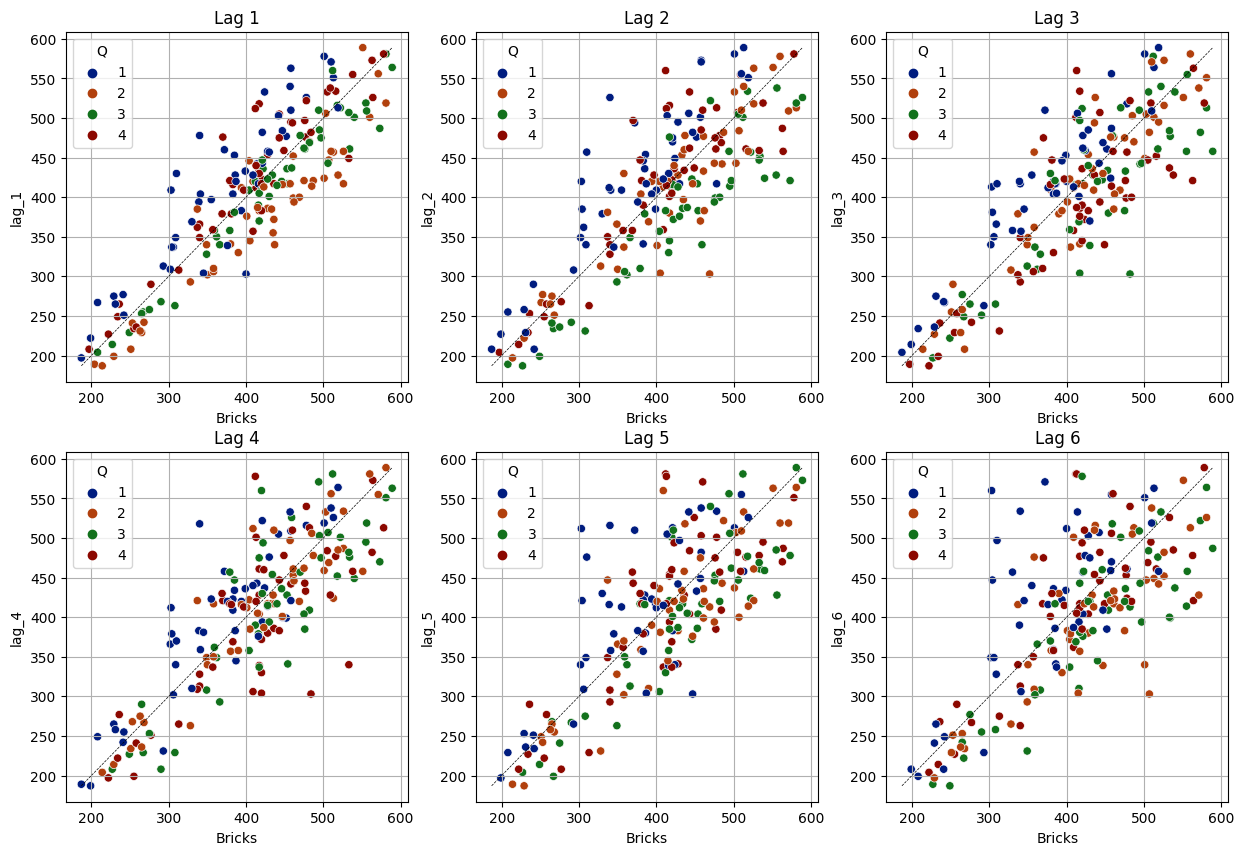

In [15]:
# Plot data
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax = ax.flatten()

for i, k in enumerate(df_aus_brick.columns[df_aus_brick.columns.str.contains('lag')]):
    sns.scatterplot(df_aus_brick, x='Bricks', y=k, hue='Q', palette='dark', ax=ax[i])
    ax[i].set_title(k.replace('_', ' ').capitalize())
    ax[i].plot(
        [df_aus_brick['Bricks'].min(), df_aus_brick['Bricks'].max()], 
        [df_aus_brick['Bricks'].min(), df_aus_brick['Bricks'].max()], 
        'k--', lw=0.5,
    )
    ax[i].grid('on')

In [16]:
df_aus_brick['Q'] = df_aus_brick['Quarter'].dt.quarter

# Create Lag Columns
for k in range(1, 7):
    df_aus_brick[f'lag_{k}'] = df_aus_brick['Bricks'].diff(4).dropna().shift(k)

df_aus_brick.head(7)

Quarter  Bricks  quarter_index  year  Q  lag_1  lag_2  lag_3  lag_4  lag_5   
0  1956Q1   189.0              1  1956  1    NaN    NaN    NaN    NaN    NaN  \
1  1956Q2   204.0              2  1956  2    NaN    NaN    NaN    NaN    NaN   
2  1956Q3   208.0              3  1956  3    NaN    NaN    NaN    NaN    NaN   
3  1956Q4   197.0              4  1956  4    NaN    NaN    NaN    NaN    NaN   
4  1957Q1   187.0              1  1957  1    NaN    NaN    NaN    NaN    NaN   
5  1957Q2   214.0              2  1957  2   -2.0    NaN    NaN    NaN    NaN   
6  1957Q3   227.0              3  1957  3   10.0   -2.0    NaN    NaN    NaN   

   lag_6  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN

In [19]:
df_aus_brick = df_aus_brick.dropna()

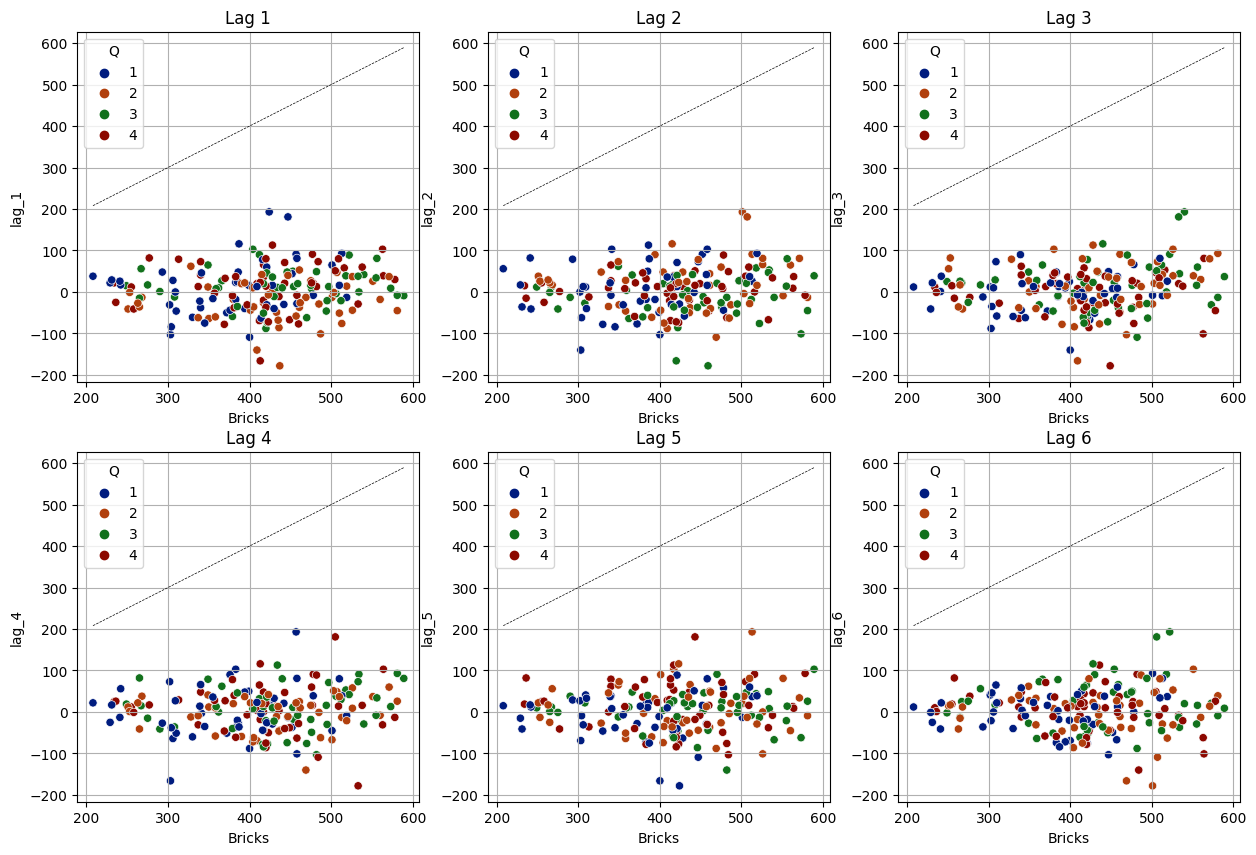

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax = ax.flatten()

for i, k in enumerate(df_aus_brick.columns[df_aus_brick.columns.str.contains('lag')]):
    sns.scatterplot(df_aus_brick, x='Bricks', y=k, hue='Q', palette='dark', ax=ax[i])
    ax[i].set_title(k.replace('_', ' ').capitalize())
    ax[i].plot(
        [df_aus_brick['Bricks'].min(), df_aus_brick['Bricks'].max()], 
        [df_aus_brick['Bricks'].min(), df_aus_brick['Bricks'].max()], 
        'k--', lw=0.5,
    )
    ax[i].grid('on')

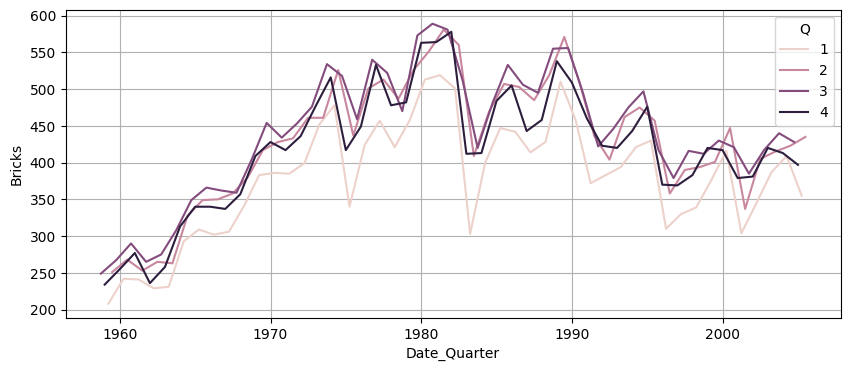

In [21]:
df_aus_brick['Date_Quarter'] = pd.to_datetime([str(k.year) + '-' + str(k.month) + '-' + str(k.day) for k in df_aus_brick.Quarter])

fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(df_aus_brick, x='Date_Quarter', y='Bricks', hue='Q', ax=ax)
ax.grid('o')

#### 1.2. Lynx from Pelt

In [80]:
df = pd.read_csv("../data/pelt.csv", index_col=[0])

df = df[["Year", "Lynx"]]

df.columns = ["year", "lynx"]

<Axes: xlabel='year'>

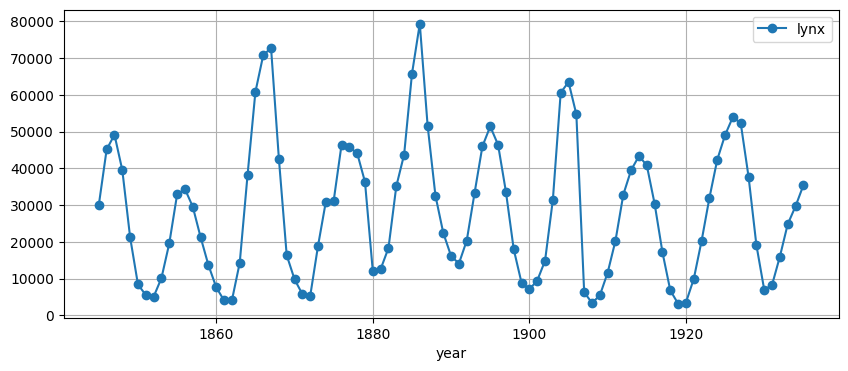

In [83]:
df.plot(x="year", y="lynx", grid=2, figsize=(10,4), marker="o")

<Axes: xlabel='year'>

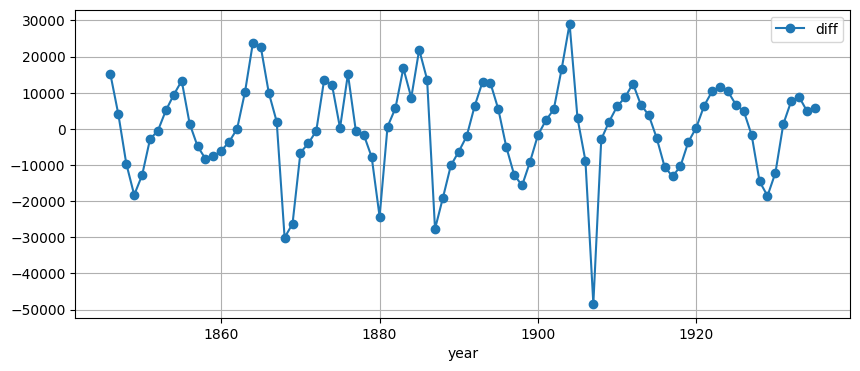

In [90]:
df["diff"] = df["lynx"].diff(1).dropna()
df.plot(x="year", y="diff", grid=2, figsize=(10,4), marker="o")

<Axes: xlabel='year'>

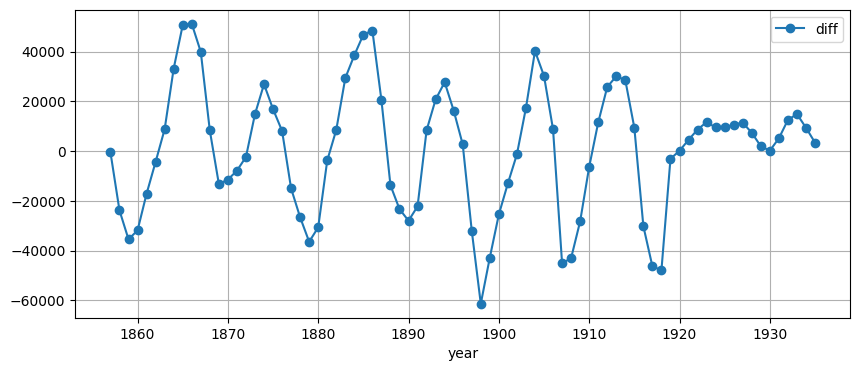

In [91]:
df["diff"] = df["lynx"].diff(12).dropna()
df.plot(x="year", y="diff", grid=2, figsize=(10,4), marker="o")

In [97]:
for k in range(1, 13):
    df[f'lag_{k}'] = df['lynx'].shift(k)

df.head(7)

year   lynx  diff    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6   
1  1845  30090   NaN      NaN      NaN      NaN      NaN      NaN      NaN  \
2  1846  45150   NaN  30090.0      NaN      NaN      NaN      NaN      NaN   
3  1847  49150   NaN  45150.0  30090.0      NaN      NaN      NaN      NaN   
4  1848  39520   NaN  49150.0  45150.0  30090.0      NaN      NaN      NaN   
5  1849  21230   NaN  39520.0  49150.0  45150.0  30090.0      NaN      NaN   
6  1850   8420   NaN  21230.0  39520.0  49150.0  45150.0  30090.0      NaN   
7  1851   5560   NaN   8420.0  21230.0  39520.0  49150.0  45150.0  30090.0   

   lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  
1    NaN    NaN    NaN     NaN     NaN     NaN  
2    NaN    NaN    NaN     NaN     NaN     NaN  
3    NaN    NaN    NaN     NaN     NaN     NaN  
4    NaN    NaN    NaN     NaN     NaN     NaN  
5    NaN    NaN    NaN     NaN     NaN     NaN  
6    NaN    NaN    NaN     NaN     NaN     NaN  
7    NaN    NaN    NaN     NaN     NaN     NaN

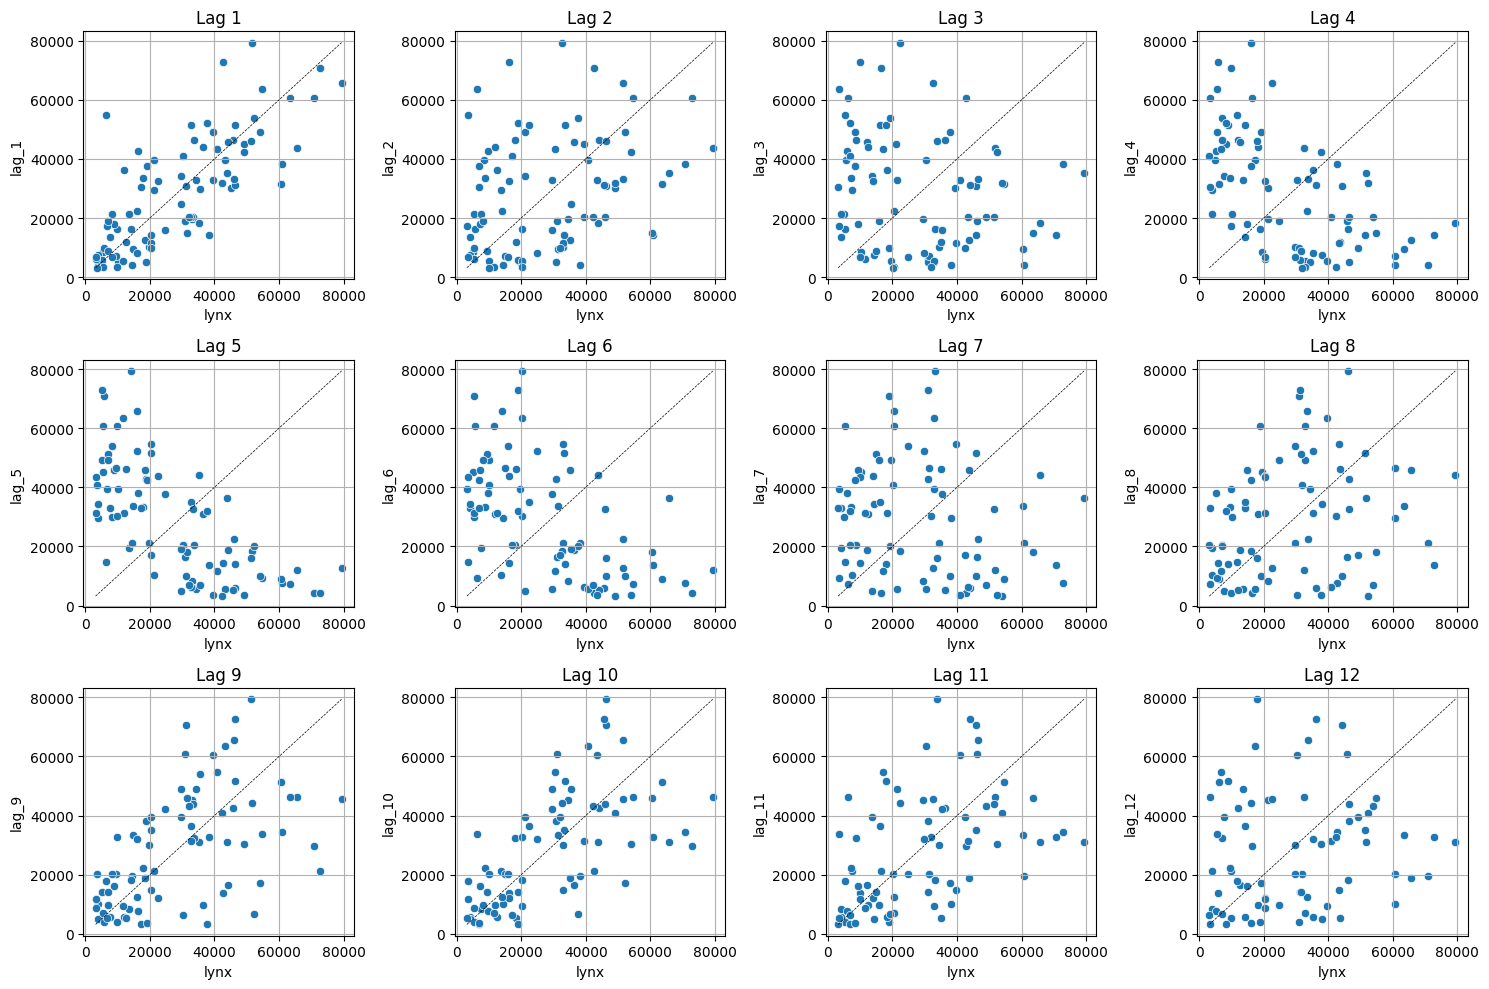

In [98]:
fig, ax = plt.subplots(3, 4, figsize=(15,10))
ax = ax.flatten()

for i, k in enumerate(df.columns[df.columns.str.contains('lag')]):
    sns.scatterplot(df, x='lynx', y=k, palette='dark', ax=ax[i])
    ax[i].set_title(k.replace('_', ' ').capitalize())
    ax[i].plot(
        [df['lynx'].min(), df['lynx'].max()], 
        [df['lynx'].min(), df['lynx'].max()], 
        'k--', lw=0.5,
    )
    ax[i].grid('on')

plt.tight_layout()

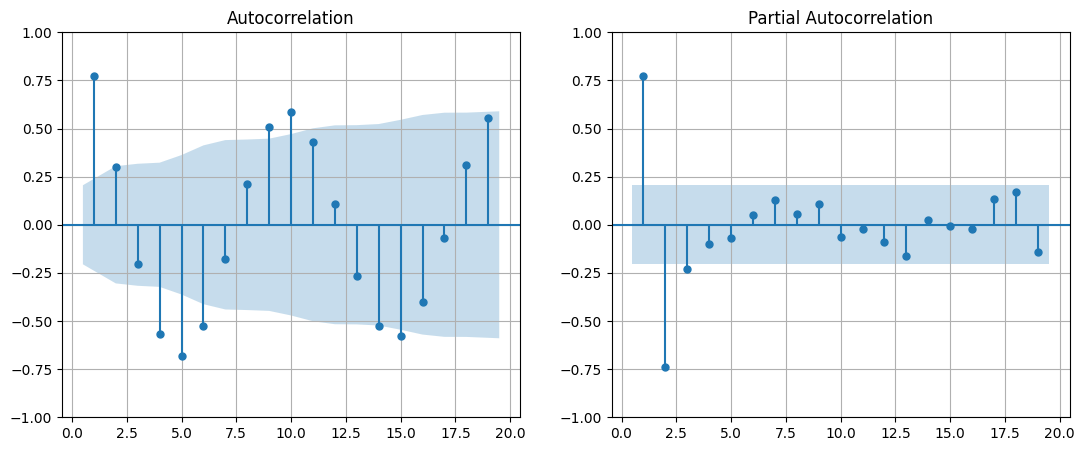

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax = ax.flatten()
plot_acf(df['lynx'], ax=ax[0], lags=range(1,20));
plot_pacf(df['lynx'], ax=ax[-1], lags=range(1,20));
for axi in ax: axi.grid(1)

#### 1.3. Close from Gafa Stock

In [192]:
# I need to select one stock to checkout
df = pd.read_csv("../data/gafa_stock.csv", index_col=[0])

df["Date2"] = pd.to_datetime(df["Date"])

<Axes: xlabel='Date'>

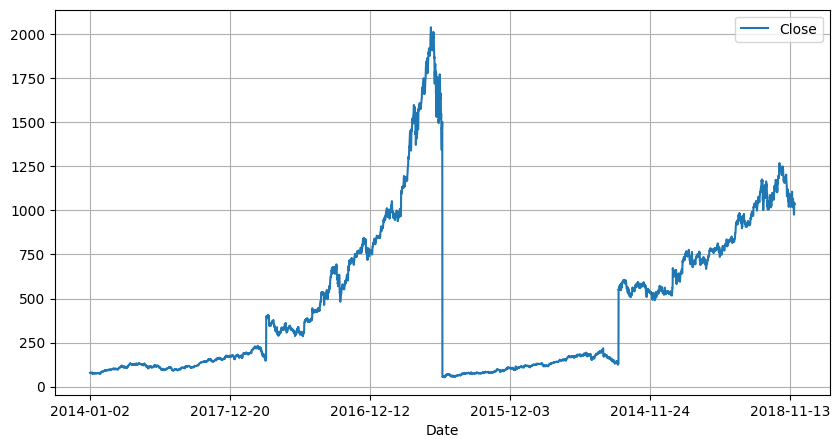

In [193]:
# String Date
df.plot(x="Date", y="Close", grid=2, figsize=(10,5))

<Axes: xlabel='Date2'>

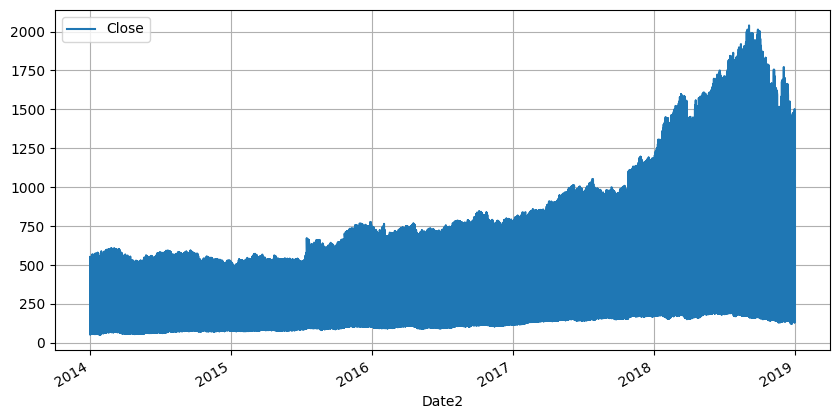

In [194]:
# Date Date
df.plot(x="Date2", y="Close", grid=2, figsize=(10,5))

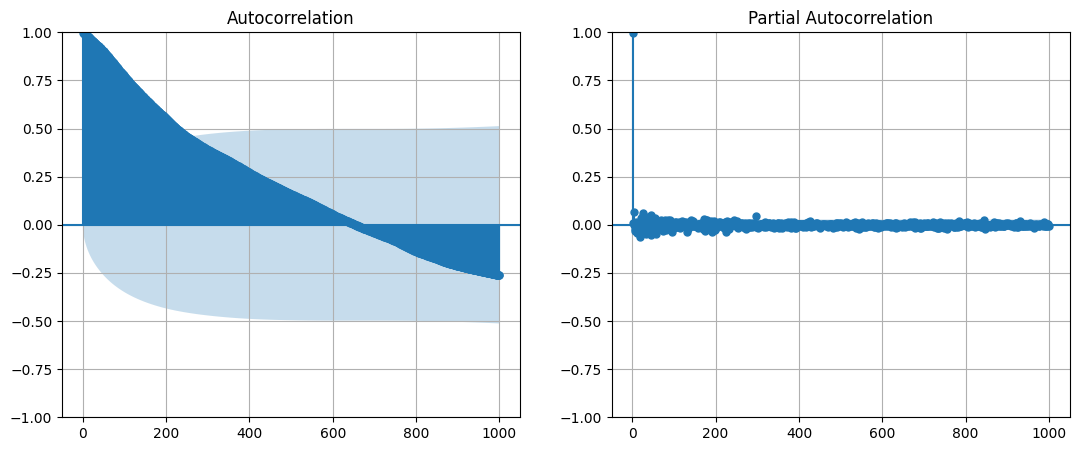

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax = ax.flatten()
plot_acf(df['Close'], ax=ax[0], lags=range(1,1000));
plot_pacf(df['Close'], ax=ax[-1], lags=range(1,1000));
for axi in ax: axi.grid(1)

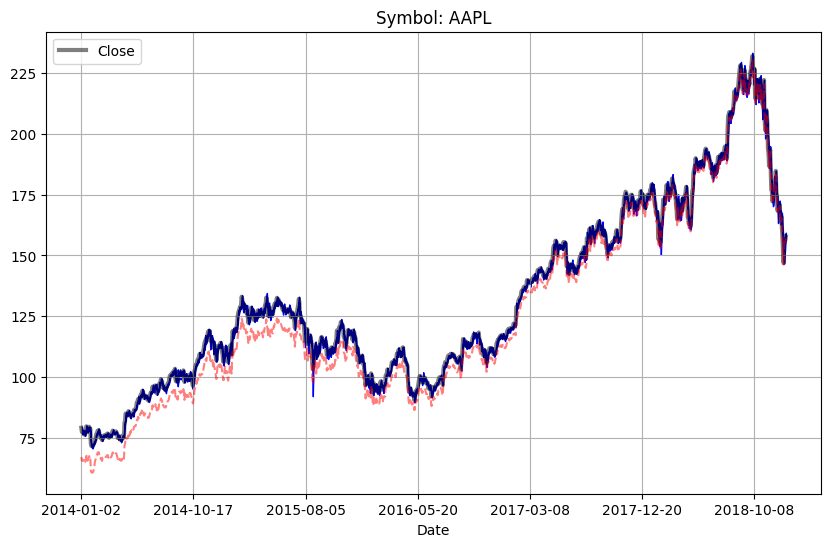

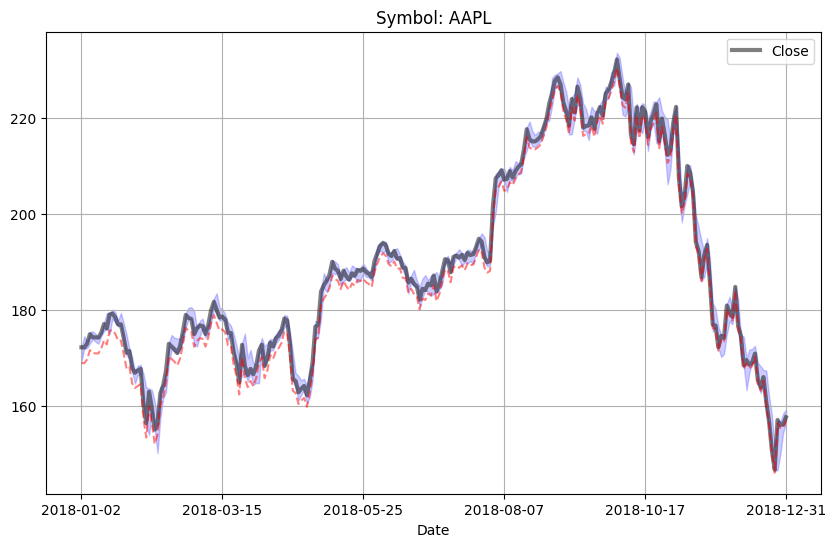

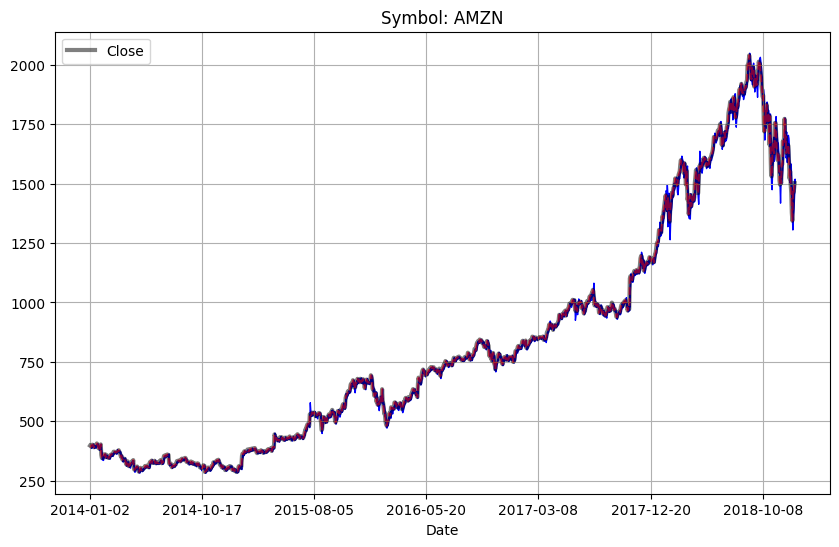

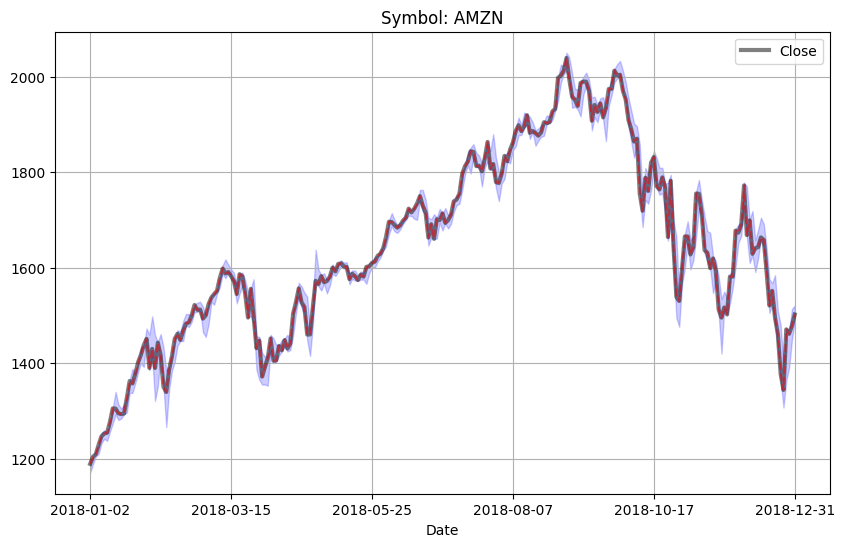

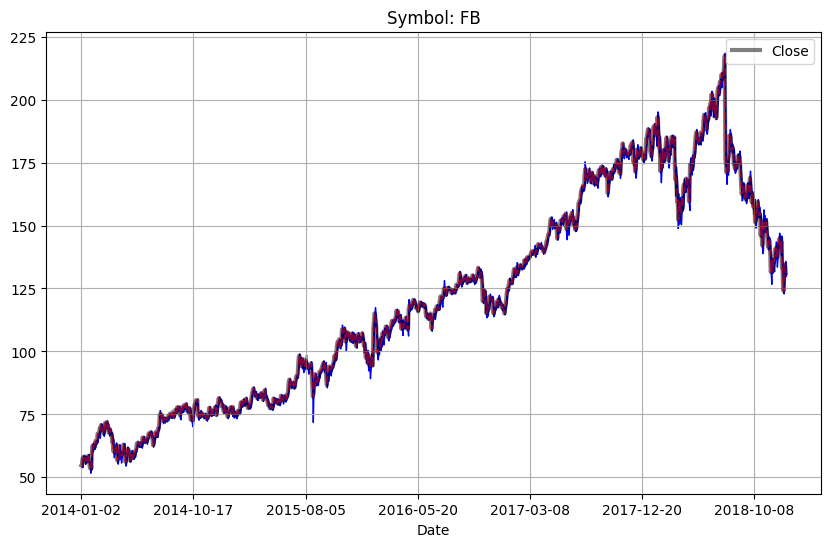

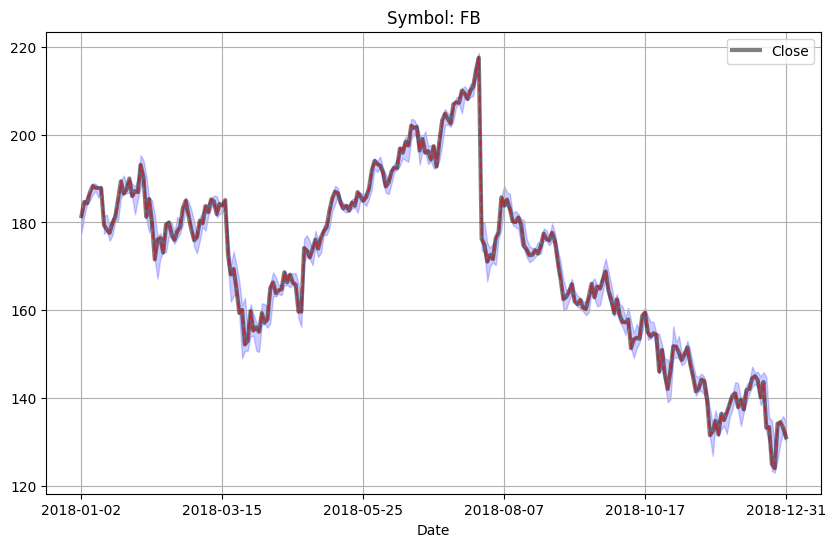

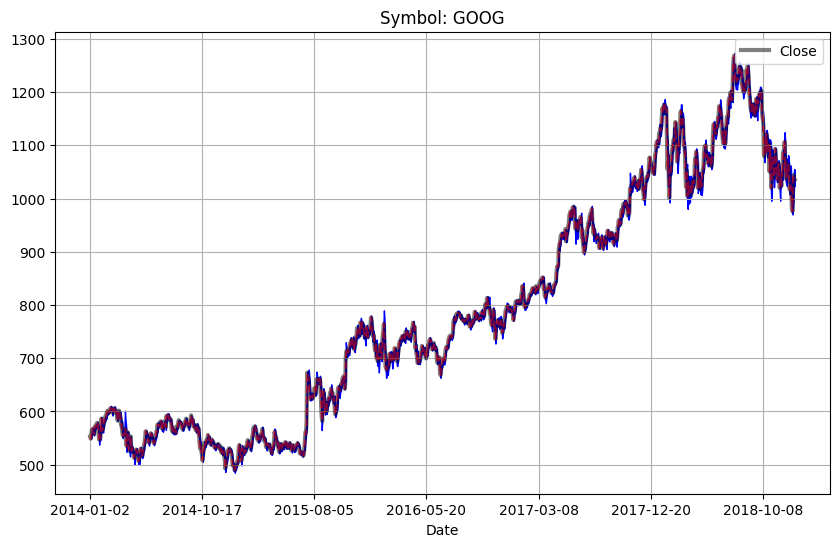

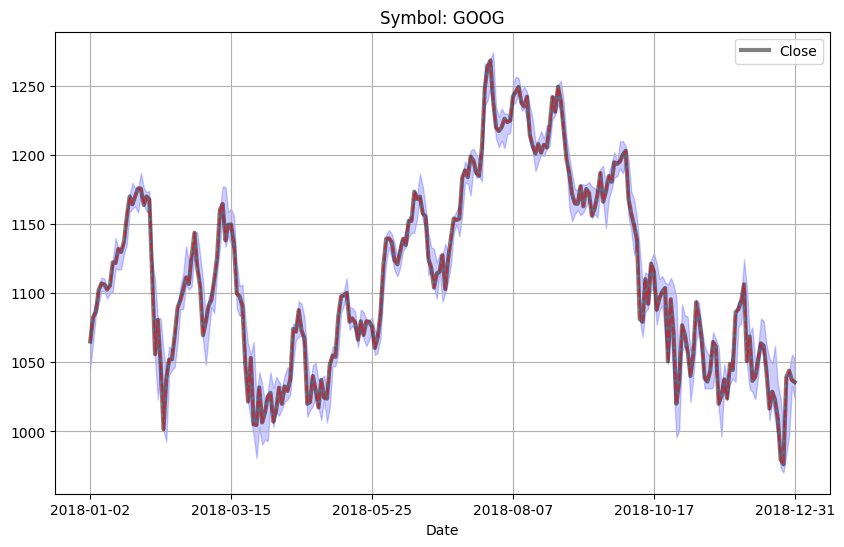

In [217]:
for symbol in df.Symbol.unique():
    dfs = df[df.Symbol == symbol]
    dfs2 = dfs[dfs.Date2.dt.year == dfs.Date2.dt.year.max()]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Symbol: {symbol}")
    dfs.plot(x="Date", y="Close", color="k", linewidth=3, ax=ax, alpha=0.5)
    p = ax.plot(dfs["Date"], dfs["Adj_Close"], "r--", alpha=0.5)
    ax.fill_between(p[0].get_xdata(), dfs["Low"], dfs["High"], color="b")

    ax.grid(True)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Symbol: {symbol}")
    dfs2.plot(x="Date", y="Close", color="k", linewidth=3, ax=ax, alpha=0.5)
    p = ax.plot(dfs2["Date"], dfs2["Adj_Close"], "r--", alpha=0.5)
    ax.fill_between(p[0].get_xdata(), dfs2["Low"], dfs2["High"], color="b", alpha=0.2)

    ax.grid(True)

#### 1.4. Demand for Vic elec

In [ ]:
### I have stresses this dataset a lot on timeseries_plots_python.ipynb

### 3.0. Tute Dataset

In [42]:
df = pd.read_csv('../data/tute1.csv')

df['Quarter'] = pd.to_datetime(df['Quarter'], format='%Y-%m-%d')
df['Q'] = df.Quarter.dt.quarter

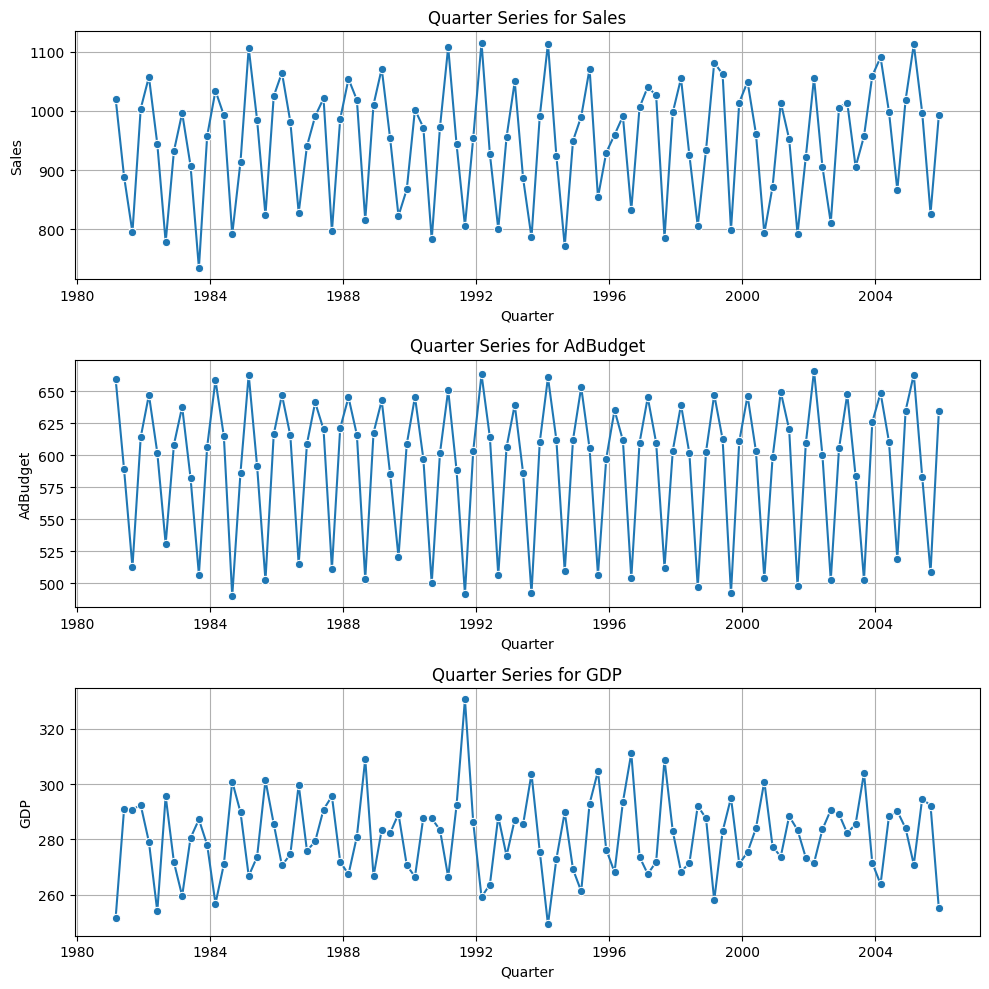

In [56]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
for col, axi in zip(df.iloc[:, 1:].columns, ax):
    sns.lineplot(df, x='Quarter', y=col, ax=axi, marker='o')
    axi.set_title(f'Quarter Series for {col}')
    axi.grid(2)

plt.tight_layout()

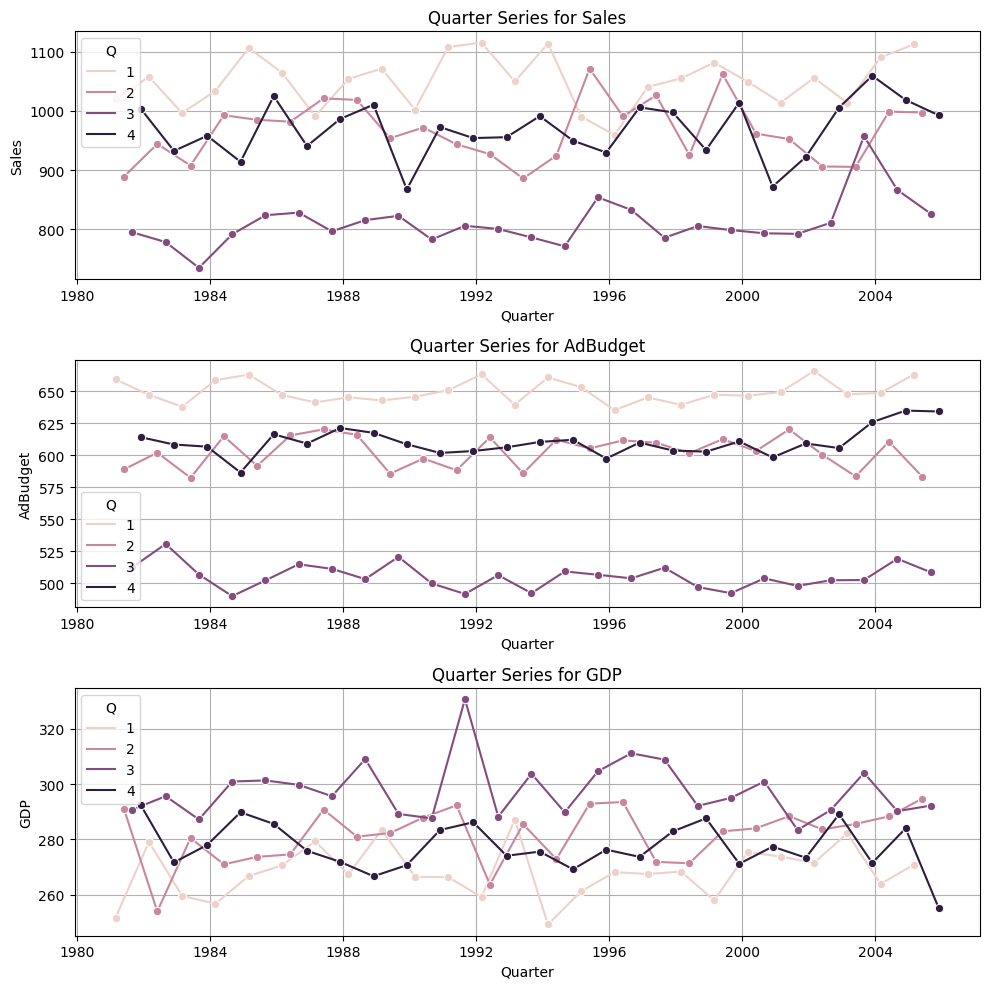

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
for col, axi in zip(df.iloc[:, 1:].columns, ax):
    sns.lineplot(df, x='Quarter', y=col, ax=axi, hue='Q', marker='o')
    axi.set_title(f'Quarter Series for {col}')
    axi.grid(2)

plt.tight_layout()

### 4.0. USgas

In [218]:
#### I do nto finded this dataset :(

### 5.0. Tourism

In [223]:
df = pd.read_csv("../data/tourism.csv", index_col=[0])
df['Quarter'] = df['Quarter'].apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

#### a. Find what combination of Region and Purpose had the maximum number of overnight trips on average.

In [232]:
df[["Region", "Purpose", "Trips"]].groupby(["Region", "Purpose"]).mean().reset_index().sort_values(by="Trips").tail(5)

Region   Purpose       Trips
269           Sydney   Holiday  550.326865
217  North Coast NSW   Holiday  587.896632
268           Sydney  Business  602.043884
199        Melbourne  Visiting  618.897541
271           Sydney  Visiting  747.269968

#### b. Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.

In [245]:
df[["Region", "Purpose", "State", "Trips"]].groupby(["Region", "Purpose", "State"]).count().reset_index().sort_values(by="Trips")

Region   Purpose              State  Trips
0            Adelaide  Business    South Australia     80
206       Murray East     Other           Victoria     80
205       Murray East   Holiday           Victoria     80
204       Murray East  Business           Victoria     80
203    Melbourne East  Visiting           Victoria     80
..                ...       ...                ...    ...
98         East Coast     Other           Tasmania     80
97         East Coast   Holiday           Tasmania     80
96         East Coast  Business           Tasmania     80
103  Experience Perth  Visiting  Western Australia     80
303   Yorke Peninsula  Visiting    South Australia     80

[304 rows x 4 columns]

In [246]:
df[["State", "Trips"]].groupby("State").count().reset_index().sort_values(by="Trips")

State  Trips
0                 ACT    320
5            Tasmania   1600
7   Western Australia   1600
2  Northern Territory   2240
3          Queensland   3840
4     South Australia   3840
1     New South Wales   4160
6            Victoria   6720

### 6.0. Aus Arrivals

In [275]:
df = pd.read_csv("../data/aus_arrivals.csv", index_col=[0])
df['Quarter'] = df['Quarter'].apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

df["Date"] = df["Quarter"].apply(lambda x: datetime(x.year, x.month, 1))

In [276]:
df.head()

Quarter Origin  Arrivals       Date
1  1981Q1  Japan     14763 1981-03-01
2  1981Q2  Japan      9321 1981-06-01
3  1981Q3  Japan     10166 1981-09-01
4  1981Q4  Japan     19509 1981-12-01
5  1982Q1  Japan     17117 1982-03-01

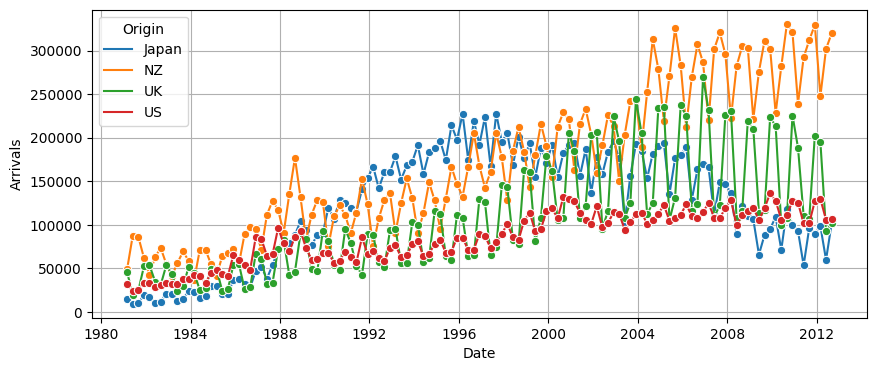

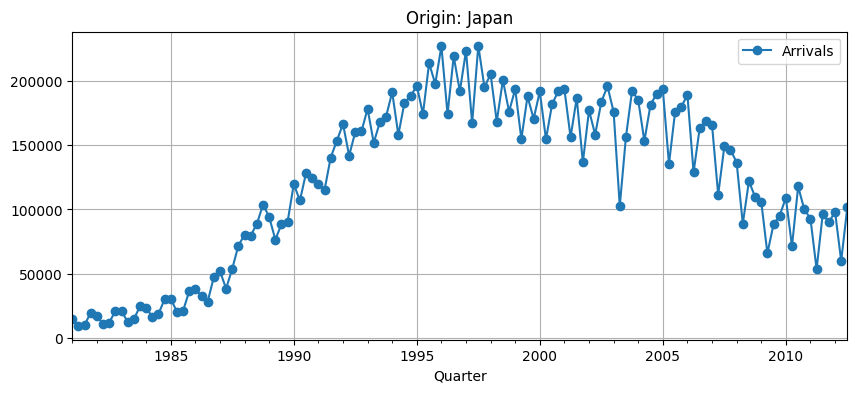

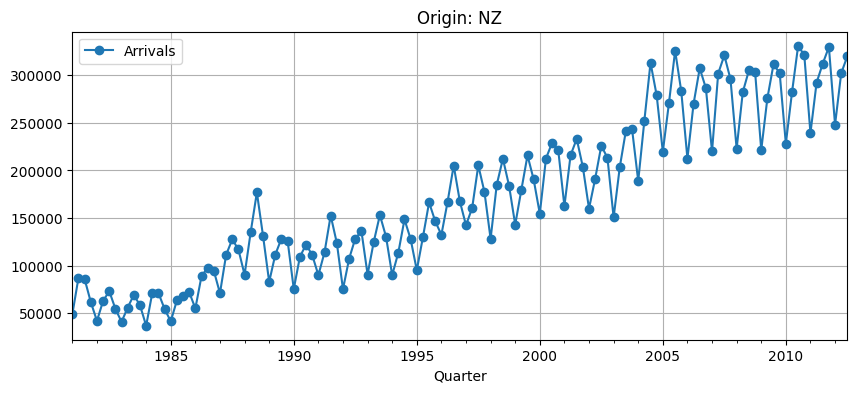

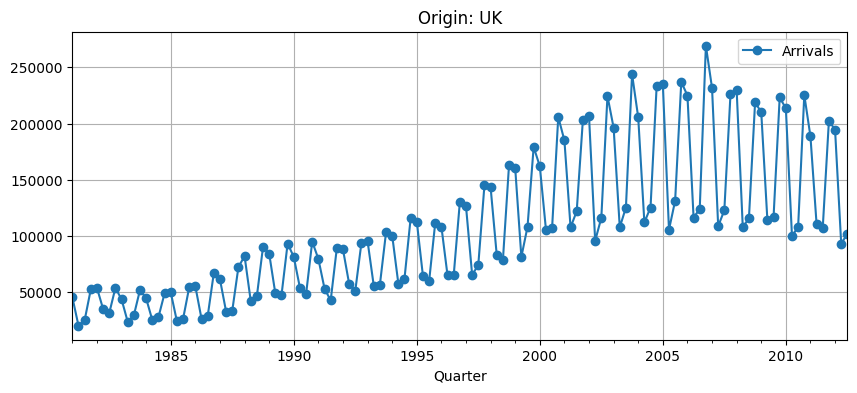

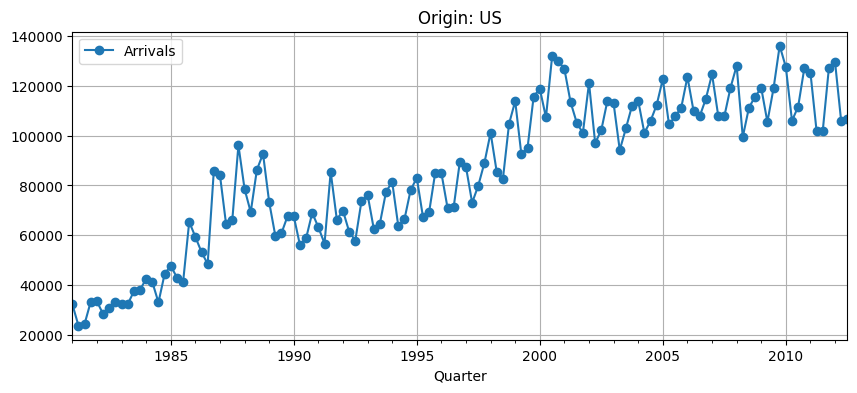

In [285]:
fig, ax = plt.subplots(figsize=(10,4))
ax.grid(2)
sns.lineplot(df, x="Date", y="Arrivals", hue="Origin", marker="o", ax=ax);

for origin in df.Origin.unique():
    dfo = df[df["Origin"] == origin]

    dfo.plot(x="Quarter", y="Arrivals", grid=2, marker="o", figsize=(10,4), title=f"Origin: {origin}");

In [350]:
df['quarter_index'] = df.Quarter.dt.quarter
df['year'] = df.Quarter.dt.year

df = df.sort_values(by='year').reset_index(drop=True)

dfi = df[df["year"] >= 2000]

In [351]:
dfi.sort_values(by="Quarter", inplace=True)

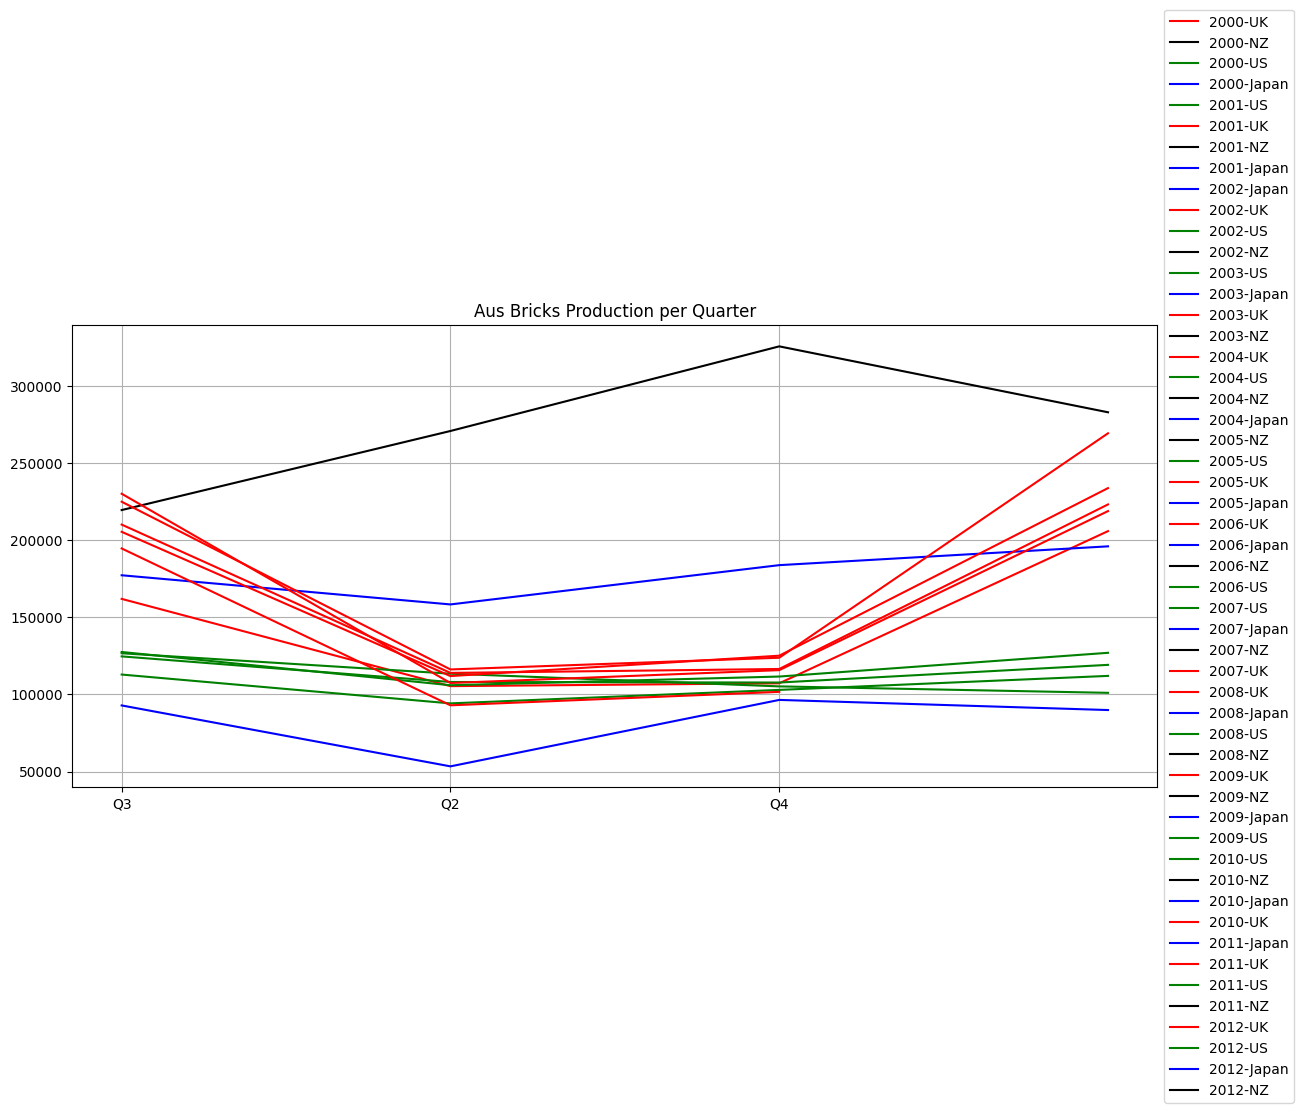

In [355]:
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(
    range(0, df.quarter_index.nunique()),
    ['Q' + str(k) for k in df.quarter_index.unique()]
)

for year in df.year.unique():
    aux = dfi[dfi['year'] == year]

    for origin in aux.Origin.unique():
        aux.sort_values(by='quarter_index', inplace=True)
        aux = aux[aux["Origin"] == origin]

        if origin == "UK":
            ax.plot(aux['quarter_index'], aux['Arrivals'], label=f"{year}-{origin}", color="r")
        
        elif origin == "Japan":
            ax.plot(aux['quarter_index'], aux['Arrivals'], label=f"{year}-{origin}", color="b")

        elif origin == "NZ":
            ax.plot(aux['quarter_index'], aux['Arrivals'], label=f"{year}-{origin}", color="k")

        else:
            ax.plot(aux['quarter_index'], aux['Arrivals'], label=f"{year}-{origin}", color="g")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Aus Bricks Production per Quarter')
ax.grid(2)

### 7.0. Aus Retail

In [18]:
np.random.seed(12345678)

df = pd.read_csv("../data/aus_retail.csv", index_col=[0])

df = df[df["Series ID"].isin(df["Series ID"].sample(1).values)]

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df.reset_index(drop=True, inplace=True)

In [22]:
df.head()

State                   Industry  Series ID      Month  Turnover
0  South Australia  Household goods retailing  A3349503T 1982-04-01      39.7
1  South Australia  Household goods retailing  A3349503T 1982-05-01      45.7
2  South Australia  Household goods retailing  A3349503T 1982-06-01      43.9
3  South Australia  Household goods retailing  A3349503T 1982-07-01      49.3
4  South Australia  Household goods retailing  A3349503T 1982-08-01      48.9

In [25]:
df.Industry.unique(), df.State.unique()

(array(['Household goods retailing'], dtype=object),
 array(['South Australia'], dtype=object))

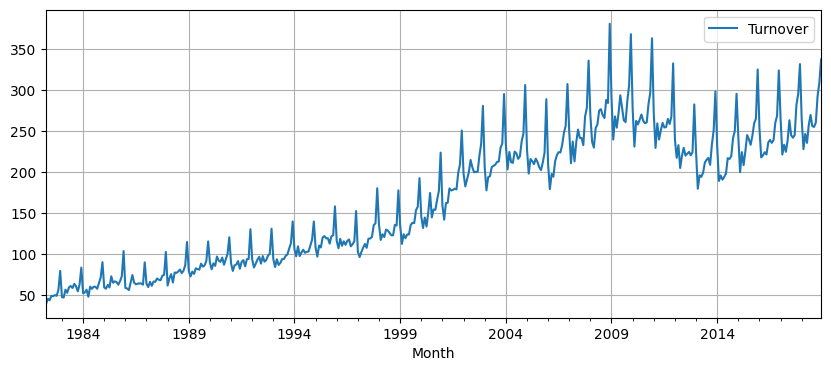

In [29]:
df.plot(
    x="Month", y="Turnover",
    grid=2, figsize=(10,4)
);

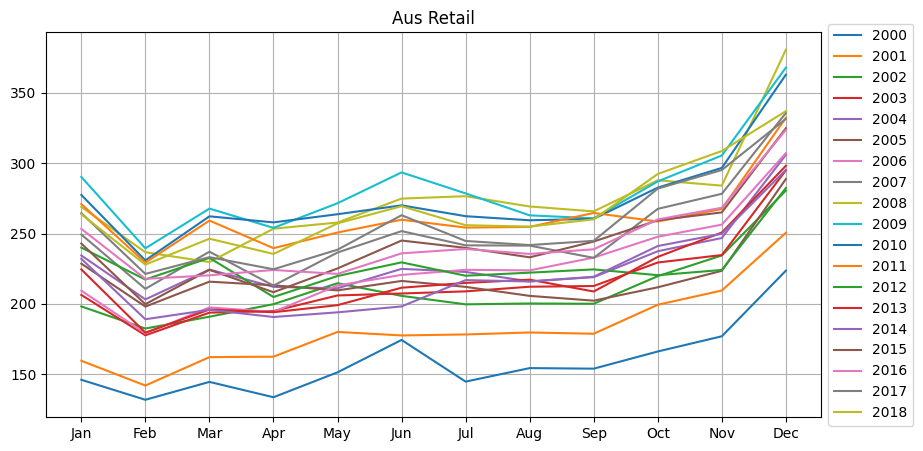

In [35]:
df['month_index'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

df = df[df["year"] >= 2000]

dfbs_plot = df[['month_index', 'year', 'Turnover']].groupby(['year', 'month_index']).sum('Turnover').reset_index()
dfbs_plot = dfbs_plot.sort_values(by=['year', 'month_index'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(
    ticks=range(1, len(dfbs_plot.month_index.unique()) + 1), 
    labels=[month_abbr[k] for k in set(dfbs_plot.month_index.unique())]
)

for variable in dfbs_plot['year'].unique():
    aux = dfbs_plot[dfbs_plot['year'] == variable]
    ax.plot(aux['month_index'], aux['Turnover'], label=variable)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Aus Retail')
ax.grid(2)

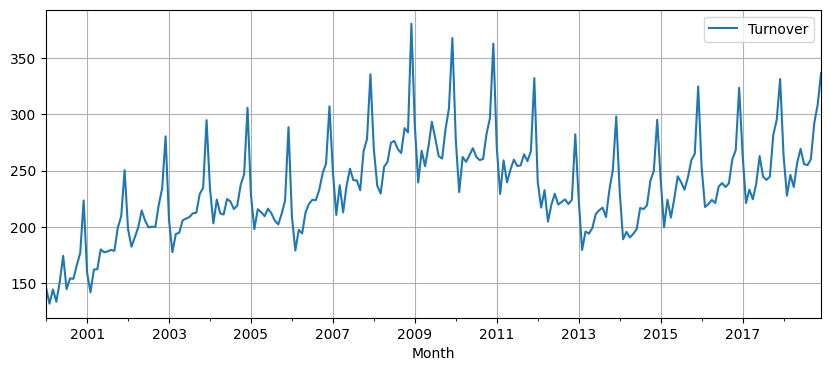

In [37]:
df.plot(
    x="Month", y="Turnover",
    grid=2, figsize=(10,4)
);

In [44]:
# Create Lag Columns
for k in range(1, 26):
    df[f'lag_{k}'] = df['Turnover'].shift(k)

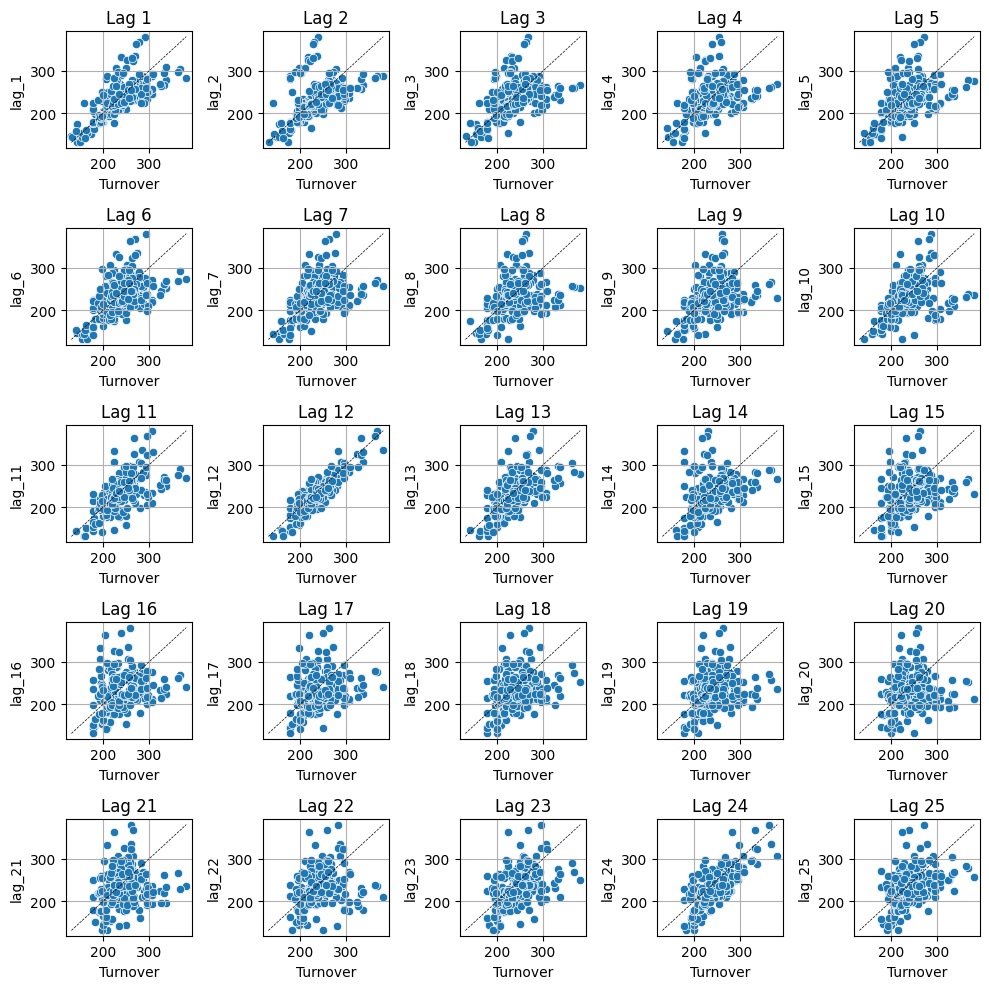

In [45]:
# Plot data
fig, ax = plt.subplots(5, 5, figsize=(10,10))
ax = ax.flatten()
for i, k in enumerate(df.columns[df.columns.str.contains('lag')]):
    sns.scatterplot(df, x='Turnover', y=k, palette='dark', ax=ax[i])
    ax[i].set_title(k.replace('_', ' ').capitalize())
    ax[i].plot(
        [df['Turnover'].min(), df['Turnover'].max()], 
        [df['Turnover'].min(), df['Turnover'].max()], 
        'k--', lw=0.5,
    )
    ax[i].grid('on')

plt.tight_layout()

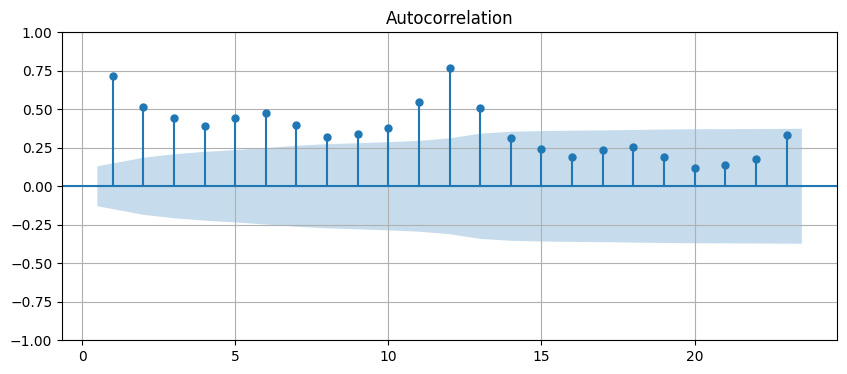

In [50]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(df["Turnover"], ax=ax, lags=range(1, 24))
ax.grid(2);

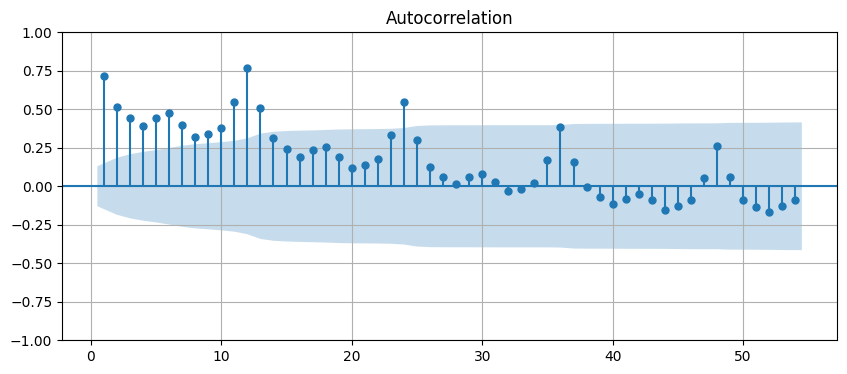

In [51]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(df["Turnover"], ax=ax, lags=range(1, 55))
ax.grid(2);

### 8.0. EDA

autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF()

#### 8.1. Us Employment

In [52]:
df = pd.read_csv("../data/us_employment.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[df["Title"] == "Total Private"].reset_index(drop=2)

In [71]:
df.Series_ID.unique()

array(['CEU0500000001'], dtype=object)

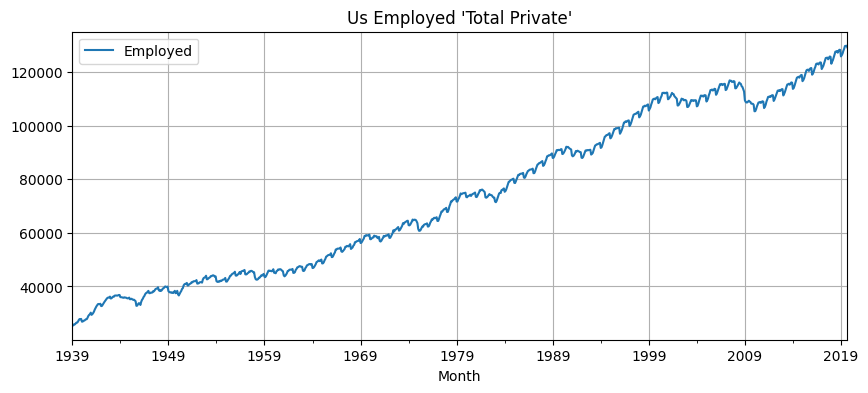

In [68]:
df.plot(
    x="Month", y="Employed",
    grid=2, figsize=(10, 4),
    title="Us Employed 'Total Private'"
);

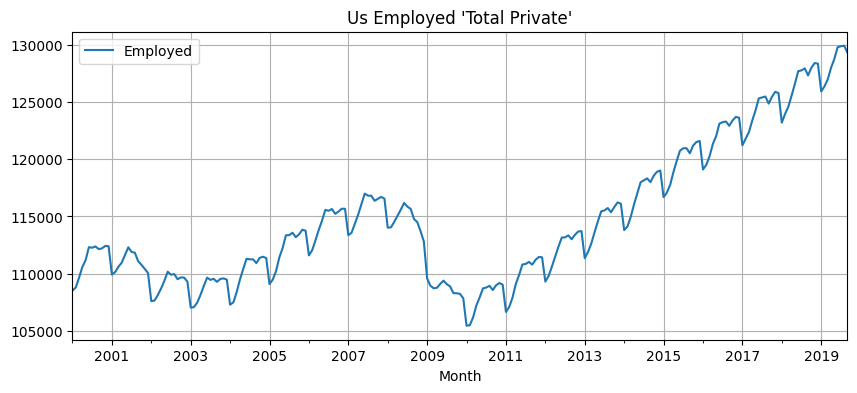

In [69]:
df[df["Month"] >= "2000-01-01"].plot(
    x="Month", y="Employed",
    grid=2, figsize=(10, 4),
    title="Us Employed 'Total Private'"
);

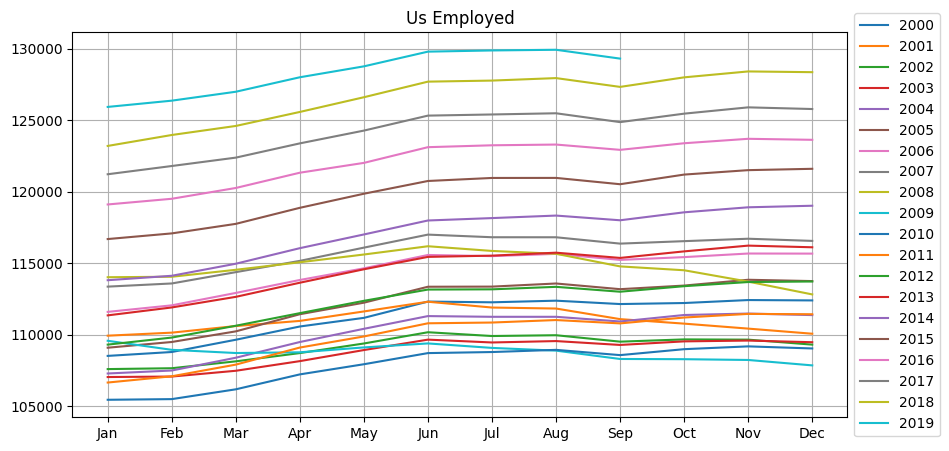

In [73]:
df['month_index'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year

df = df[df["year"] >= 2000]

dfbs_plot = df[['month_index', 'year', 'Employed']].groupby(['year', 'month_index']).sum('Employed').reset_index()
dfbs_plot = dfbs_plot.sort_values(by=['year', 'month_index'])

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(
    ticks=range(1, len(dfbs_plot.month_index.unique()) + 1), 
    labels=[month_abbr[k] for k in set(dfbs_plot.month_index.unique())]
)

for variable in dfbs_plot['year'].unique():
    aux = dfbs_plot[dfbs_plot['year'] == variable]
    ax.plot(aux['month_index'], aux['Employed'], label=variable)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Us Employed')
ax.grid(2)

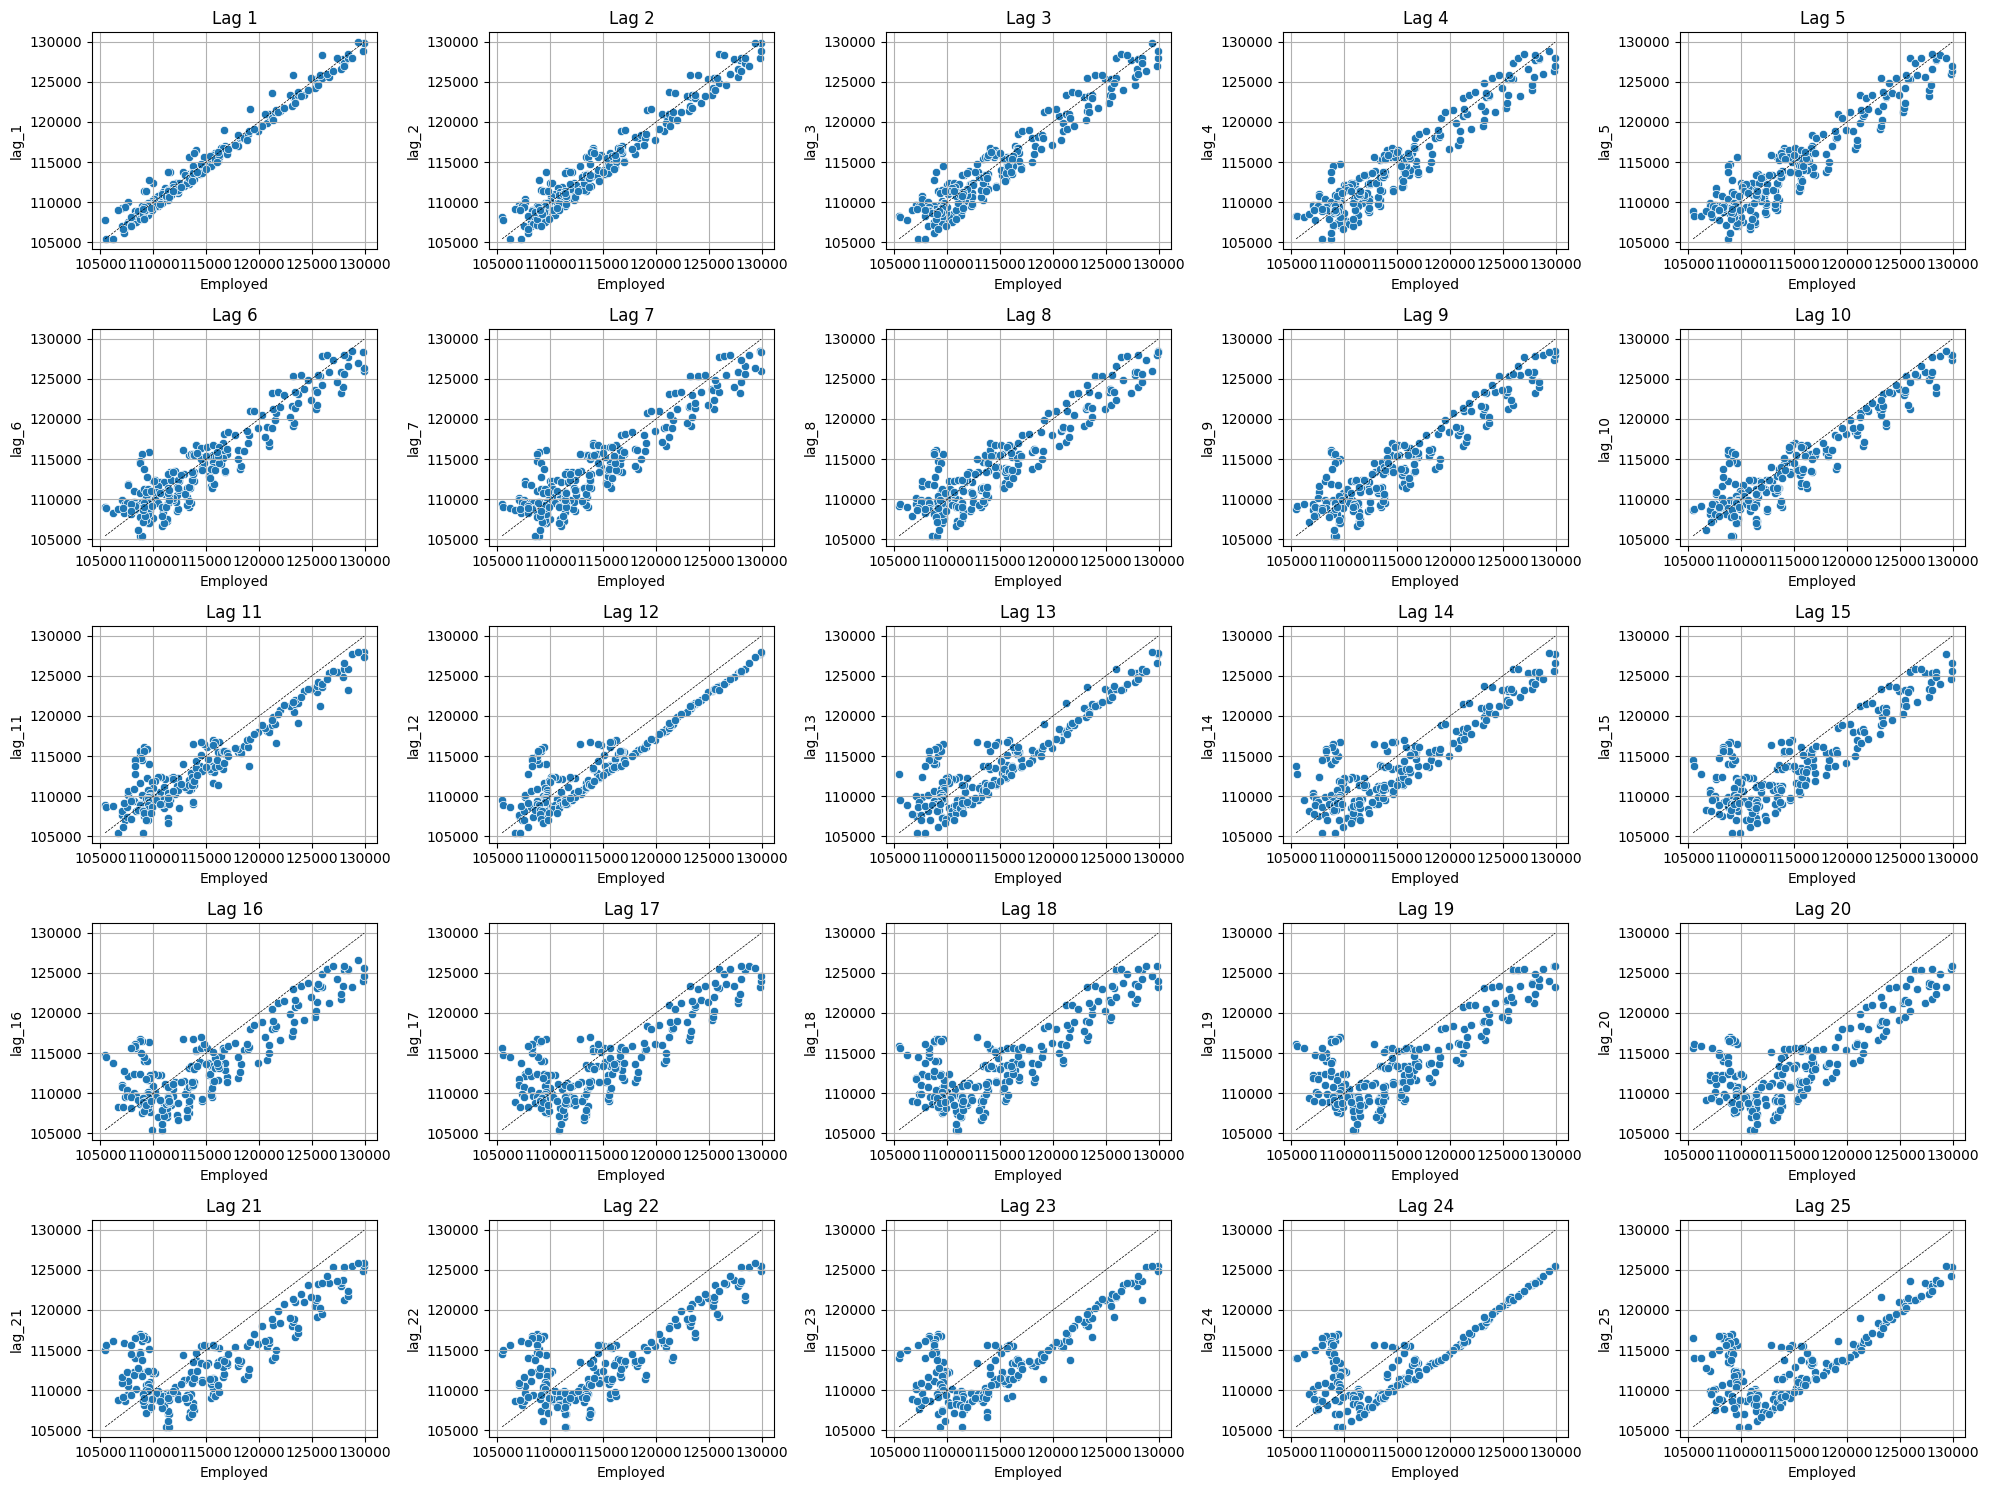

In [76]:
# Create Lag Columns
for k in range(1, 26):
    df[f'lag_{k}'] = df['Employed'].shift(k)

# Plot data
fig, ax = plt.subplots(5, 5, figsize=(20,15))
ax = ax.flatten()
for i, k in enumerate(df.columns[df.columns.str.contains('lag')]):
    sns.scatterplot(df, x='Employed', y=k, palette='dark', ax=ax[i])
    ax[i].set_title(k.replace('_', ' ').capitalize())
    ax[i].plot(
        [df['Employed'].min(), df['Employed'].max()], 
        [df['Employed'].min(), df['Employed'].max()], 
        'k--', lw=0.5,
    )
    ax[i].grid('on')

plt.tight_layout()

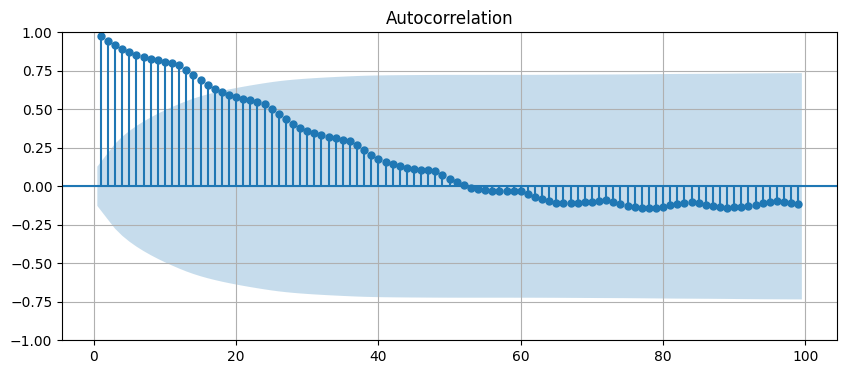

In [78]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(df["Employed"], ax=ax, lags=range(1, 100))
ax.grid(2);

### 9.0. Match ACF with Plot

- B -> Daily temperature of Cow.

- A -> Monthly Accidental Deaths.

- D -> Monthly Air Passangers.

- C -> Annual Mink Traping.

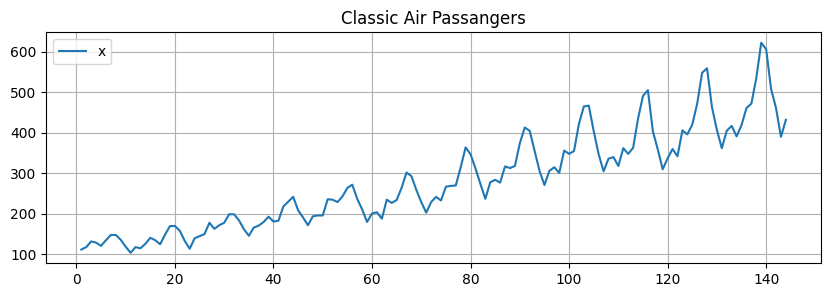

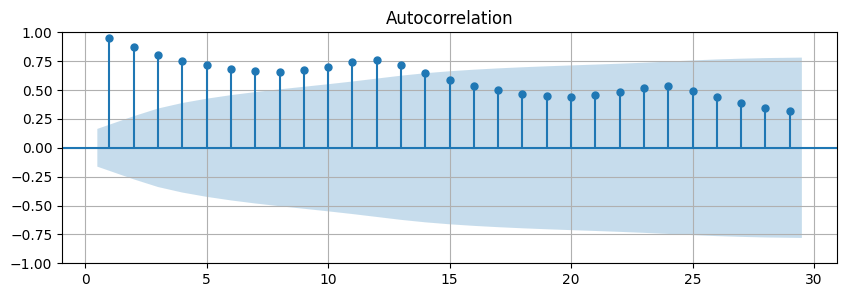

In [104]:
df = pd.read_csv("../data/AirPassengers.csv", index_col=[0])

df.plot(grid=2, figsize=(10,3), title="Classic Air Passangers");

fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df["x"], ax=ax, lags=range(1, 30))
ax.grid(2)

### 10.0. Aus Livestock

In [111]:
df = pd.read_csv("../data/aus_livestock.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[(df["Animal"] == "Pigs") &
        (df["Month"] >= "1990-01-01") &
        (df["Month"] < "1995-01-01")]

In [120]:
df.head()

Month Animal                         State   Count
20647 1990-01-01   Pigs  Australian Capital Territory  5900.0
20648 1990-02-01   Pigs  Australian Capital Territory  5000.0
20649 1990-03-01   Pigs  Australian Capital Territory  6800.0
20650 1990-04-01   Pigs  Australian Capital Territory  6800.0
20651 1990-05-01   Pigs  Australian Capital Territory  7000.0

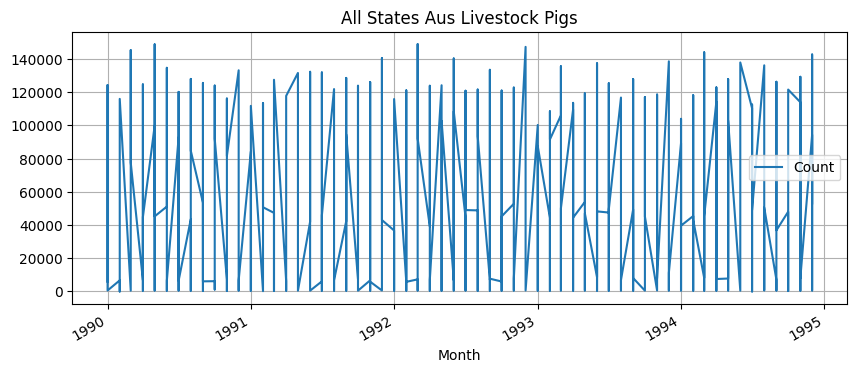

In [118]:
df.plot(
    x="Month", y="Count",
    grid=2, figsize=(10, 4),
    title="All States Aus Livestock Pigs"
);

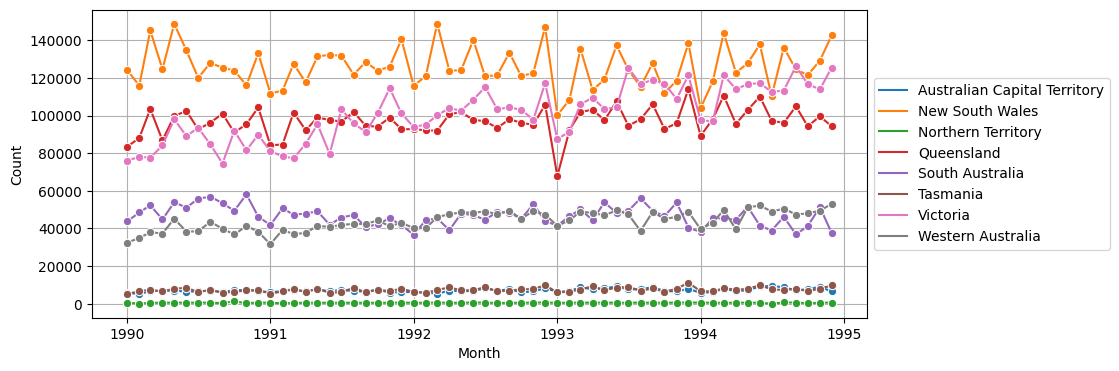

In [126]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(df, x="Month", y="Count", hue="State", marker="o", ax=ax)
ax.grid(2)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

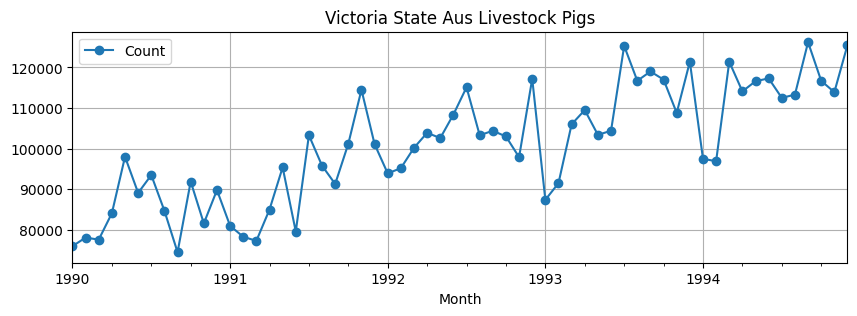

In [136]:
df = df[df["State"] == "Victoria"]

df.plot(
    x="Month", y="Count",
    grid=2, figsize=(10, 3),
    marker="o",
    title="Victoria State Aus Livestock Pigs"
);

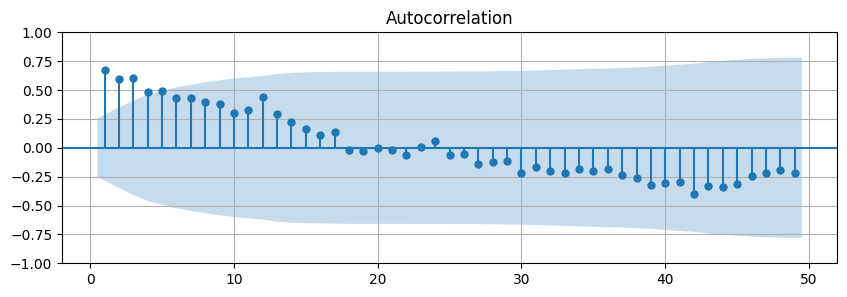

In [137]:
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df["Count"], ax=ax, lags=range(1, 50))
ax.grid(2)

### 11.0. Gafa Stock

a. Reindex for compute Diff.

b. Plots differences.

c. Yes, because acf plot and autoplot.

In [149]:
df = pd.read_csv("../data/gafa_stock.csv", index_col=[0])

df["Date"] = pd.to_datetime(df["Date"])

df = df[(df["Symbol"] == "GOOG") & (df["Date"] >= "2018-01-01")].reset_index(drop=2)

df["Diff"] = df["Close"].diff()

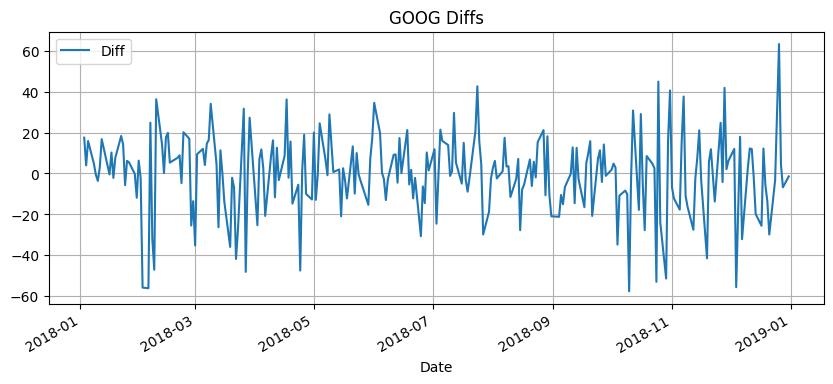

In [152]:
df.plot(
    x="Date", y="Diff",
    grid=2, figsize=(10, 4), title="GOOG Diffs"
);

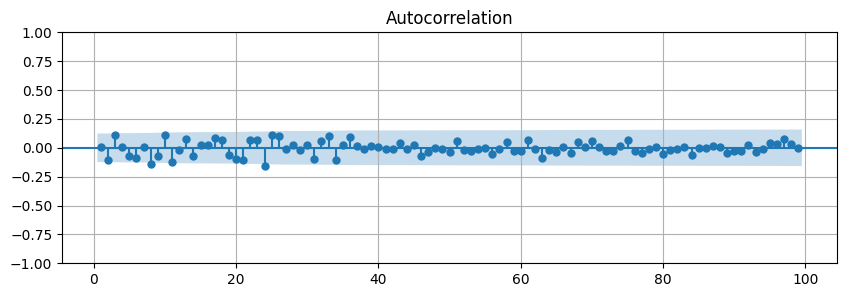

In [158]:
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df["Diff"].dropna(), ax=ax, lags=range(1, 100))
ax.grid(2)